# Diabetic Readmission

Junxue - PCA, SVM

Zoe - Missing values/imputation or deletion, XGBoost

James - Dummy conversion, Random Forest, Deep Learning

Sandra - Oversampling, ADA Boost, Gradient Boost

# Step 1: Data Preprocessing

In [2]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt  
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# import needed libraries for models
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.inspection import permutation_importance
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

#import needed libararies for smote and undersampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

#import needed libraries for standardizing data
from sklearn.preprocessing import StandardScaler

#import needed libraries for PCA
from sklearn.decomposition import PCA

In [3]:
# set pandas options so we see all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
### Merging didn't work
# pip install nbmerge

#!nbmerge james.ipynb pca.ipynb missing.ipynb > merged.ipynb

# Unreadable Notebook: C:\Users\sandr\Box Sync\MScA\31009 
# Machine Learning\Group project\merged.ipynb NotJSONError("Notebook does not appear to be JSON: ''...")

# Import

In [4]:
data = pd.read_csv('diabetic_data.csv')

data.describe(include='all')

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,1.017660e+05,1.017660e+05,101766,101766,101766,101766,101766.000000,101766.000000,101766.000000,101766.000000,101766,101766,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766,101766,101766,101766.000000,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,NaN,NaN,6,3,10,10,NaN,NaN,NaN,NaN,18,73,NaN,NaN,NaN,NaN,NaN,NaN,717,749,790,NaN,4,4,4,4,4,4,4,2,4,4,2,4,4,4,4,2,3,1,1,4,4,2,2,2,2,2,2,3
top,NaN,NaN,Caucasian,Female,[70-80),?,NaN,NaN,NaN,NaN,?,?,NaN,NaN,NaN,NaN,NaN,NaN,428,276,250,NaN,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
freq,NaN,NaN,76099,54708,26068,98569,NaN,NaN,NaN,NaN,40256,49949,NaN,NaN,NaN,NaN,NaN,NaN,6862,6752,11555,NaN,96420,84748,81778,100227,101063,101680,96575,101765,89080,91116,101743,94438,95401,101458,101728,101763,101727,101766,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864
mean,1.652016e+08,5.433040e+07,NaN,NaN,NaN,NaN,2.024006,3.715642,5.754437,4.395987,NaN,NaN,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,NaN,NaN,NaN,7.422607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.026403e+08,3.869636e+07,NaN,NaN,NaN,NaN,1.445403,5.280166,4.064081,2.985108,NaN,NaN,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,NaN,NaN,NaN,1.933600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.252200e+04,1.350000e+02,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,8.496119e+07,2.341322e+07,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,2.000000,NaN,NaN,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.523890e+08,4.550514e+07,NaN,NaN,NaN,NaN,1.000000,1.000000,7.000000,4.000000,NaN,NaN,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.302709e+08,8.754595e+07,NaN,NaN,NaN,NaN,3.000000,4.000000,7.000000,6.000000,NaN,NaN,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data['weight'].value_counts()

# Too many missing values - drop

?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64

In [6]:
data['payer_code'].value_counts()

# Too many missing values - drop

?     40256
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: payer_code, dtype: int64

# Missing values

In [7]:
data = data.drop(columns = ['weight','payer_code'])
data = data.dropna(subset=['encounter_id','patient_nbr','race','gender','age',
                           'admission_type_id','discharge_disposition_id',
                           'admission_source_id','time_in_hospital','max_glu_serum',
                           'A1Cresult','metformin','repaglinide','nateglinide',
                           'chlorpropamide','glimepiride','acetohexamide','glipizide',
                           'glyburide','tolbutamide','pioglitazone','rosiglitazone',
                           'acarbose','miglitol','troglitazone','tolazamide','examide',
                           'citoglipton','insulin','glyburide-metformin',
                           'glipizide-metformin','glimepiride-pioglitazone',
                           'metformin-rosiglitazone','metformin-pioglitazone','change',
                           'diabetesMed','readmitted'])

In [8]:
data['Numeric_diag_1'] = pd.to_numeric(data['diag_1'], errors='coerce')
mask = data['Numeric_diag_1'].isna()
data.loc[mask, 'FreeText_diag_1'] = data.loc[mask, 'diag_1']
data = data.drop(columns=['diag_1'])

In [9]:
data['Numeric_diag_2'] = pd.to_numeric(data['diag_2'], errors='coerce')
mask = data['Numeric_diag_2'].isna()
data.loc[mask, 'FreeText_diag_2'] = data.loc[mask, 'diag_2']
data = data.drop(columns=['diag_2'])

In [10]:
data['Numeric_diag_3'] = pd.to_numeric(data['diag_3'], errors='coerce')
mask = data['Numeric_diag_3'].isna()
data.loc[mask, 'FreeText_diag_3'] = data.loc[mask, 'diag_3']
data = data.drop(columns=['diag_3'])

In [11]:
data['Numeric_diag_1'] = data['Numeric_diag_1'].fillna(data['Numeric_diag_1'].mean())
data['Numeric_diag_2'] = data['Numeric_diag_2'].fillna(data['Numeric_diag_2'].mean())
data['Numeric_diag_3'] = data['Numeric_diag_3'].fillna(data['Numeric_diag_3'].mean())

In [12]:
data.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Numeric_diag_1,FreeText_diag_1,Numeric_diag_2,FreeText_diag_2,Numeric_diag_3,FreeText_diag_3
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,Pediatrics-Endocrinology,41,0,1,0,0,0,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,250.83,NaN,438.674883,?,418.179285,?
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,?,59,0,18,0,0,0,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,276.00,NaN,250.010000,NaN,255.000000,NaN
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,?,11,5,13,2,0,1,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,648.00,NaN,250.000000,NaN,418.179285,V27
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,?,44,1,16,0,0,0,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,8.00,NaN,250.430000,NaN,403.000000,NaN
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,?,51,0,8,0,0,0,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,197.00,NaN,157.000000,NaN,250.000000,NaN


# Dummies

In [13]:
# look at dataset as a whole
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101766 entries, 0 to 101765
Data columns (total 51 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            101766 non-null int64
number_diagnoses            101766 non-null int64
max_glu_serum               101766 

In [14]:
# drop encounter id and patient number fields since they do not provide any value to model
data_prep = data.drop(['encounter_id'],axis=1)
# data_prep = data_prep.drop(['patient_nbr'],axis=1) # dropped above

# look at new data processing dataframe
data_prep.head()

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Numeric_diag_1,FreeText_diag_1,Numeric_diag_2,FreeText_diag_2,Numeric_diag_3,FreeText_diag_3
0,8222157,Caucasian,Female,[0-10),6,25,1,1,Pediatrics-Endocrinology,41,0,1,0,0,0,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,250.83,NaN,438.674883,?,418.179285,?
1,55629189,Caucasian,Female,[10-20),1,1,7,3,?,59,0,18,0,0,0,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,276.00,NaN,250.010000,NaN,255.000000,NaN
2,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,?,11,5,13,2,0,1,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,648.00,NaN,250.000000,NaN,418.179285,V27
3,82442376,Caucasian,Male,[30-40),1,1,7,2,?,44,1,16,0,0,0,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,8.00,NaN,250.430000,NaN,403.000000,NaN
4,42519267,Caucasian,Male,[40-50),1,1,7,1,?,51,0,8,0,0,0,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,197.00,NaN,157.000000,NaN,250.000000,NaN


In [15]:
# look at race feature values
data_prep['race'].value_counts()

Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [16]:
# drop records from race where there ia ?
data_prep = data_prep[data_prep['race'] != '?'] 

In [17]:
# look at race feature values
data_prep['race'].value_counts()

Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [18]:
# one hot encode race column
data_prep = pd.get_dummies(data_prep, columns=['race'])

# look at data
data_prep.head()

,patient_nbr,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Numeric_diag_1,FreeText_diag_1,Numeric_diag_2,FreeText_diag_2,Numeric_diag_3,FreeText_diag_3,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other
0,8222157,Female,[0-10),6,25,1,1,Pediatrics-Endocrinology,41,0,1,0,0,0,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,250.83,NaN,438.674883,?,418.179285,?,0,0,1,0,0
1,55629189,Female,[10-20),1,1,7,3,?,59,0,18,0,0,0,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,276.00,NaN,250.010000,NaN,255.000000,NaN,0,0,1,0,0
2,86047875,Female,[20-30),1,1,7,2,?,11,5,13,2,0,1,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,648.00,NaN,250.000000,NaN,418.179285,V27,1,0,0,0,0
3,82442376,Male,[30-40),1,1,7,2,?,44,1,16,0,0,0,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,8.00,NaN,250.430000,NaN,403.000000,NaN,0,0,1,0,0
4,42519267,Male,[40-50),1,1,7,1,?,51,0,8,0,0,0,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,197.00,NaN,157.000000,NaN,250.000000,NaN,0,0,1,0,0


In [19]:
# look at gender feature values
data_prep['gender'].value_counts()

Female             53575
Male               45917
Unknown/Invalid        1
Name: gender, dtype: int64

In [20]:
# drop records from gender where there is Unknown/Invalid
data_prep = data_prep[data_prep['gender'] != 'Unknown/Invalid'] 

In [21]:
# look at gender feature values
data_prep['gender'].value_counts()

Female    53575
Male      45917
Name: gender, dtype: int64

In [22]:
# one hot encode gender column
data_prep = pd.get_dummies(data_prep, columns=['gender'])

# look at data
data_prep.head()

,patient_nbr,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Numeric_diag_1,FreeText_diag_1,Numeric_diag_2,FreeText_diag_2,Numeric_diag_3,FreeText_diag_3,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male
0,8222157,[0-10),6,25,1,1,Pediatrics-Endocrinology,41,0,1,0,0,0,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,250.83,NaN,438.674883,?,418.179285,?,0,0,1,0,0,1,0
1,55629189,[10-20),1,1,7,3,?,59,0,18,0,0,0,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,276.00,NaN,250.010000,NaN,255.000000,NaN,0,0,1,0,0,1,0
2,86047875,[20-30),1,1,7,2,?,11,5,13,2,0,1,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,648.00,NaN,250.000000,NaN,418.179285,V27,1,0,0,0,0,1,0
3,82442376,[30-40),1,1,7,2,?,44,1,16,0,0,0,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,8.00,NaN,250.430000,NaN,403.000000,NaN,0,0,1,0,0,0,1
4,42519267,[40-50),1,1,7,1,?,51,0,8,0,0,0,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,197.00,NaN,157.000000,NaN,250.000000,NaN,0,0,1,0,0,0,1


In [23]:
# look at age feature values
data_prep['age'].value_counts()

[70-80)     25468
[60-70)     21988
[50-60)     16895
[80-90)     16800
[40-50)      9465
[30-40)      3699
[90-100)     2724
[20-30)      1611
[10-20)       682
[0-10)        160
Name: age, dtype: int64

In [24]:
# one hot encode gender column
data_prep = pd.get_dummies(data_prep, columns=['age'])

# look at data
data_prep.head()

,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Numeric_diag_1,FreeText_diag_1,Numeric_diag_2,FreeText_diag_2,Numeric_diag_3,FreeText_diag_3,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100)
0,8222157,6,25,1,1,Pediatrics-Endocrinology,41,0,1,0,0,0,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,250.83,NaN,438.674883,?,418.179285,?,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0
1,55629189,1,1,7,3,?,59,0,18,0,0,0,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,276.00,NaN,250.010000,NaN,255.000000,NaN,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0
2,86047875,1,1,7,2,?,11,5,13,2,0,1,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,648.00,NaN,250.000000,NaN,418.179285,V27,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
3,82442376,1,1,7,2,?,44,1,16,0,0,0,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,8.00,NaN,250.430000,NaN,403.000000,NaN,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,42519267,1,1,7,1,?,51,0,8,0,0,0,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,197.00,NaN,157.000000,NaN,250.000000,NaN,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [25]:
# look at admission_type_id values
data_prep['admission_type_id'].value_counts() #int field with no missing values. Leave as is.

1    52900
3    18507
2    17786
6     5225
5     4727
8      317
7       20
4       10
Name: admission_type_id, dtype: int64

In [26]:
# look at discharge_disposition_id values
data_prep['discharge_disposition_id'].value_counts() #int field with no missing values. Leave as is.

1     58767
3     13614
6     12698
18     3673
2      2061
22     1981
11     1608
5      1143
25      973
4       765
7       611
23      406
13      397
14      369
28      138
8       107
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: discharge_disposition_id, dtype: int64

In [27]:
# look at time_in_hospital values
data_prep['time_in_hospital'].value_counts() #int field with no missing values. Leave as is.

3     17342
2     16841
1     13877
4     13605
5      9763
6      7366
7      5720
8      4297
9      2940
10     2291
11     1816
12     1427
13     1189
14     1018
Name: time_in_hospital, dtype: int64

In [28]:
# look at medical_specialty values
data_prep['medical_specialty'].value_counts() #This field has too many categories. Need to consolidate.

?                                       48766
InternalMedicine                        14197
Emergency/Trauma                         7540
Family/GeneralPractice                   7271
Cardiology                               5246
Surgery-General                          3043
Nephrology                               1593
Orthopedics                              1377
Orthopedics-Reconstructive               1190
Radiologist                              1117
Pulmonology                               840
Psychiatry                                829
Urology                                   670
ObstetricsandGynecology                   649
Surgery-Cardiovascular/Thoracic           629
Gastroenterology                          560
Surgery-Vascular                          533
Surgery-Neuro                             455
PhysicalMedicineandRehabilitation         382
Oncology                                  347
Pediatrics                                249
Hematology/Oncology               

In [29]:
# drop records from medical_specialty where there is a ?
# data_prep = data_prep[data_prep['medical_specialty'] != '?'] 

In [30]:
# look at medical_specialty values
data_prep['medical_specialty'].value_counts()

?                                       48766
InternalMedicine                        14197
Emergency/Trauma                         7540
Family/GeneralPractice                   7271
Cardiology                               5246
Surgery-General                          3043
Nephrology                               1593
Orthopedics                              1377
Orthopedics-Reconstructive               1190
Radiologist                              1117
Pulmonology                               840
Psychiatry                                829
Urology                                   670
ObstetricsandGynecology                   649
Surgery-Cardiovascular/Thoracic           629
Gastroenterology                          560
Surgery-Vascular                          533
Surgery-Neuro                             455
PhysicalMedicineandRehabilitation         382
Oncology                                  347
Pediatrics                                249
Hematology/Oncology               

In [31]:
# convert medical_specialty field to top 5 categories and other
data_prep['Med_Spec_Missing']=data_prep['medical_specialty'].apply(lambda x: 1 if x in ('?') else 0)
data_prep['Med_Spec_InternalMedicine']=data_prep['medical_specialty'].apply(lambda x: 1 if x in ('InternalMedicine') else 0)
data_prep['Med_Spec_Emergency/Trauma']=data_prep['medical_specialty'].apply(lambda x: 1 if x in ('Emergency/Trauma') else 0)
data_prep['Med_Spec_Family/GeneralPractice']=data_prep['medical_specialty'].apply(lambda x: 1 if x in ('Family/GeneralPractice') else 0)

# Clinically meaningful - diabetics get more heart disease and are twice as likely to die of heart attack or stroke 
# https://pubmed.ncbi.nlm.nih.gov/11587045/
data_prep['Med_Spec_Cardiology']=data_prep['medical_specialty'].apply(lambda x: 1 if x in ('Cardiology') else 0)
data_prep['Med_Spec_Surgery-General']=data_prep['medical_specialty'].apply(lambda x: 1 if x in ('Surgery-General') else 0)

# Sandra added nephrology as kidneys fail in diabetes
# https://www.mayoclinic.org/diseases-conditions/diabetic-nephropathy/symptoms-causes/syc-20354556
data_prep['Med_Spec_Nephrology']=data_prep['medical_specialty'].apply(lambda x: 1 if x in ('Nephrology') else 0)

# Sandra wanted to add endocrinology as they are the diabetic specialists, but there are only 118
# https://www.mayoclinic.org/diseases-conditions/diabetic-nephropathy/symptoms-causes/syc-20354556
#data_prep['Med_Spec_Endocrinology']=data_prep['medical_specialty'].apply(lambda x: 1 if x in ('Endocrinology') else 0)

data_prep['Med_Spec_Other']=data_prep['medical_specialty'].apply(lambda x: 0 if x in ('InternalMedicine','Emergency/Trauma','Family/GeneralPractice','Cardiology','Surgery-General', 'Nephrology', '?') else 1)

# drop original medical_specialty field
data_prep = data_prep.drop(['medical_specialty'],axis=1)

# look at data
data_prep.head()

,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Numeric_diag_1,FreeText_diag_1,Numeric_diag_2,FreeText_diag_2,Numeric_diag_3,FreeText_diag_3,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),Med_Spec_Missing,Med_Spec_InternalMedicine,Med_Spec_Emergency/Trauma,Med_Spec_Family/GeneralPractice,Med_Spec_Cardiology,Med_Spec_Surgery-General,Med_Spec_Nephrology,Med_Spec_Other
0,8222157,6,25,1,1,41,0,1,0,0,0,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,250.83,NaN,438.674883,?,418.179285,?,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,55629189,1,1,7,3,59,0,18,0,0,0,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,276.00,NaN,250.010000,NaN,255.000000,NaN,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,86047875,1,1,7,2,11,5,13,2,0,1,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,648.00,NaN,250.000000,NaN,418.179285,V27,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,82442376,1,1,7,2,44,1,16,0,0,0,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,8.00,NaN,250.430000,NaN,403.000000,NaN,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,42519267,1,1,7,1,51,0,8,0,0,0,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,197.00,NaN,157.000000,NaN,250.000000,NaN,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [32]:
# look at num_lab_procedures values
data_prep['num_lab_procedures'].value_counts() #int field with no missing values. Leave as is.

1      3146
43     2750
44     2448
45     2328
38     2164
46     2153
40     2142
41     2071
47     2070
42     2062
39     2059
37     2033
49     2019
48     2009
36     1912
50     1877
51     1877
35     1871
54     1828
52     1797
55     1786
56     1774
53     1763
57     1699
58     1668
34     1633
61     1604
59     1592
60     1561
63     1418
62     1408
30     1317
29     1312
32     1300
64     1299
31     1284
33     1259
65     1213
66     1180
2      1084
26     1070
67     1064
25     1029
68     1024
28     1019
69      972
19      960
9       919
10      824
23      820
70      801
27      797
71      781
20      752
17      735
72      731
18      723
24      720
22      683
11      676
21      668
3       658
73      652
74      595
16      536
75      506
12      496
76      455
15      442
77      416
13      395
4       370
8       355
78      348
79      329
14      329
7       316
80      288
5       281
81      280
6       280
82      225
83      222
84  

In [33]:
# look at num_procedures values
data_prep['num_procedures'].value_counts() #int field with no missing values. Leave as is.

0    45500
1    20328
2    12488
3     9269
6     4825
4     4098
5     2984
Name: num_procedures, dtype: int64

In [34]:
# look at num_medications values
data_prep['num_medications'].value_counts() #int field with no missing values. Leave as is.

13    5929
12    5866
11    5664
15    5662
14    5579
16    5305
10    5244
17    4819
9     4802
18    4421
8     4266
19    3965
20    3608
7     3401
21    3163
22    2812
6     2632
23    2384
24    2074
5     1964
25    1857
26    1576
27    1414
4     1376
28    1212
29     971
3      877
30     832
31     697
32     608
33     495
2      458
34     443
35     383
37     285
36     281
1      251
38     221
39     205
40     174
41     138
43     126
42     124
44      98
46      89
45      80
47      72
49      61
48      57
52      53
50      52
51      43
53      37
56      37
54      33
55      31
57      26
58      24
59      20
60      20
62      15
61      14
63      13
65      12
68       7
67       7
64       7
69       5
66       5
72       3
70       2
75       2
74       1
79       1
81       1
Name: num_medications, dtype: int64

In [35]:
# look at number_outpatient values
data_prep['number_outpatient'].value_counts() #int field with no missing values. Leave as is.

0     82992
1      8409
2      3543
3      2021
4      1083
5       525
6       299
7       155
8        98
9        83
10       57
11       41
13       31
12       30
14       28
15       20
16       15
17        8
21        7
20        7
22        5
18        5
19        3
24        3
27        3
23        2
25        2
26        2
29        2
33        2
35        2
36        2
40        1
28        1
34        1
37        1
38        1
39        1
42        1
Name: number_outpatient, dtype: int64

In [36]:
# look at number_emergency values
data_prep['number_emergency'].value_counts() #int field with no missing values. Leave as is.

0     88189
1      7615
2      2027
3       722
4       374
5       192
6        94
7        73
8        50
10       34
9        33
11       23
13       12
12       10
22        6
18        5
16        5
19        4
20        4
14        3
15        3
21        2
25        2
76        1
54        1
24        1
28        1
29        1
37        1
42        1
46        1
64        1
63        1
Name: number_emergency, dtype: int64

In [37]:
# look at number_inpatient values
data_prep['number_inpatient'].value_counts() #int field with no missing values. Leave as is.

0     65811
1     19218
2      7472
3      3374
4      1607
5       807
6       480
7       268
8       150
9       111
10       61
11       49
12       34
13       20
14       10
15        9
16        6
19        2
17        1
18        1
21        1
Name: number_inpatient, dtype: int64

# Question dropping diagnoses - Sandra

In [58]:
# drop all 3 diagnosis columns since we do not know how to use them
#data_prep = data_prep.drop(['diag_1'],axis=1)
#data_prep = data_prep.drop(['diag_2'],axis=1)
#data_prep = data_prep.drop(['diag_3'],axis=1)

In [38]:
print("Diag 1")
print(data_prep['Numeric_diag_1'].value_counts().head(10))
print(" ")
print(data_prep['FreeText_diag_1'].value_counts().head(11)) # One "?" in the top 10

Diag 1
428.0    6739
414.0    6406
786.0    3938
410.0    3518
486.0    3425
427.0    2712
491.0    2228
715.0    2099
682.0    1996
780.0    1991
Name: Numeric_diag_1, dtype: int64
 
V57    1181
V58     223
V55      70
V53      43
V54      42
?        19
V56      16
V71       9
V63       8
V45       4
V66       2
Name: FreeText_diag_1, dtype: int64


## Diag 1

### Numeric

414.00000    3668  Other forms of chronic ischemic heart disease

428.00000    3263  Heart failure

786.00000    2092 Symptoms involving respiratory system and other chest symptoms

486.00000    1653 Pneumonia

410.00000    1565 Acute myocardial infarction (heart attack)

715.00000    1439 Osteoarthrosis and allied disorders

427.00000    1355 Cardiac dysrhythmias

996.00000    1126 Complications peculiar to certain specified procedures, Mechanical complication of cardiac device implant and graft

682.00000    1018 Other cellulitis and abscess

780.00000     982 General symptoms

### Text

V57    657 Care involving use of rehabilitation procedures.

V58    142 Encounter for other and unspecified procedures and aftercare

V55     37 Attention to artificial openings (tracheotomy, colostomy, etc)

V54     30 Other orthopedic aftercare

V53     29 Fitting and adjustment of other device

V56      9 Encounter for dialysis and dialysis catheter care -- KIDNEYS losing function

V71      8 Observation and evaluation for suspected conditions not found

V45      3 Other postprocedural states

V26      2 Procreative management

V66      1 Convalescence and palliative care

In [39]:
print("Diag 2")
print(data_prep['Numeric_diag_2'].value_counts().head(10))
print(" ")
print(data_prep['FreeText_diag_2'].value_counts().head(11))  # One "?" in the top 10
print(" ")

Diag 2
276.000000    6638
428.000000    6522
250.000000    5879
427.000000    4933
401.000000    3641
496.000000    3236
599.000000    3236
438.674883    2843
403.000000    2790
414.000000    2575
Name: Numeric_diag_2, dtype: int64
 
V45     406
?       336
V42     262
V85     167
V58     156
V43     129
V15     124
E878    112
E885    110
E888    106
V10     101
Name: FreeText_diag_2, dtype: int64
 


## Diag 2

### Numeric

250.000000    3348 Diabetes Mellitus

276.000000    3270 Disorders of fluid electrolyte and acid-base balance

428.000000    3164 Heart failure

427.000000    2405 Cardiac dysrhythmias

401.000000    2052  Essential hypertension

403.000000    1662 Hypertensive chronic kidney disease

496.000000    1556 Chronic airway obstruction, not elsewhere classified

438.674883    1443 Late effects of cerebrovascular disease

599.000000    1426 Other disorders of urethra and urinary tract

411.000000    1345 Other acute and subacute forms of ischemic heart disease


### Text

V45     225 Other postprocedural states

V42     133 Organ or tissue replaced by transplant

V15      76 Other personal history presenting hazards to health

V43      72 Organ or tissue replaced by other means

V58      68 Encounter for other and unspecified procedures and aftercare

E878     68 Surgical operation and other surgical procedures as the cause of abnormal reaction of patient or of later complication without mention of misadventure at the time of operation

V85      58 Body mass index (bmi)

V10      54 Personal history of malignant neoplasm (CANCER)

E888     48 Other and unspecified fall

V12      40 Personal history of certain other diseases

In [40]:
print("Diag 3")
print(data_prep['Numeric_diag_3'].value_counts().head(10))
print(" ")
print(data_prep['FreeText_diag_3'].value_counts().head(11))  # One "?" in the top 10

Diag 3
250.000000    11227
401.000000     8097
418.179285     6327
276.000000     5100
428.000000     4496
427.000000     3871
414.000000     3569
496.000000     2555
403.000000     2322
585.000000     1950
Name: Numeric_diag_3, dtype: int64
 
V45     1373
?       1349
V58      498
V15      328
V42      238
V10      233
E849     213
V43      204
V12      203
E878     160
E888     130
Name: FreeText_diag_3, dtype: int64


## Diag 3

### Numeric

250.000000    6134 Diabetes Mellitus

401.000000    4413 Essential hypertension

418.179285    3374 ? no such code

276.000000    2426 Disorders of fluid electrolyte and acid-base balance

428.000000    2125 Heart failure

414.000000    1862 Other forms of chronic ischemic heart disease

427.000000    1859 Cardiac dysrhythmias

403.000000    1204 Hypertensive chronic kidney disease

496.000000    1202 Chronic airway obstruction, not elsewhere classified

272.000000    1014 Disorders of lipoid metabolism

### Text
 

V45     741 Other postprocedural states

V58     262 Encounter for other and unspecified procedures and aftercare

V15     186 Other personal history presenting hazards to health

V10     131 Personal history of malignant neoplasm (CANCER)

V42     117  Organ or tissue replaced by transplant

V12     112 Personal history of certain other diseases

V43     107 Organ or tissue replaced by other means

E849     77 Vehicle accident place

E878     72 Surgical operation and other surgical procedures as the cause of abnormal reaction of patient or of later complication without mention of misadventure at the time of operation

V09      42 Infection with drug-resistant microorganisms

In [41]:
# Making dummies for major diagnoses

# Diabetes Mellitus
data_prep['DXDiabetes'] = np.where(
    data_prep[['Numeric_diag_1', 'Numeric_diag_2', 'Numeric_diag_3']].eq(250).any(axis=1), 1, 0)

# Disorders of lipoid metabolism
data_prep['DXLipid'] = np.where(
    data_prep[['Numeric_diag_1', 'Numeric_diag_2', 'Numeric_diag_3']].eq(272).any(axis=1), 1, 0)

# Disorders of fluid electrolyte and acid-base balance
data_prep['DXFluid']= np.where(
    data_prep[['Numeric_diag_1', 'Numeric_diag_2', 'Numeric_diag_3']].eq(276).any(axis=1), 1, 0)

# Hypertension
data_prep['DXHypertension']= np.where(
    data_prep[['Numeric_diag_1', 'Numeric_diag_2', 'Numeric_diag_3']].eq(401).any(axis=1), 1, 0)

# Hypertensive kidney disease
data_prep['DXHTN_Kidney']= np.where(
    data_prep[['Numeric_diag_1', 'Numeric_diag_2', 'Numeric_diag_3']].eq(403).any(axis=1), 1, 0)

# Heart attack
data_prep['DXHeartAttack']= np.where(
    data_prep[['Numeric_diag_1', 'Numeric_diag_2', 'Numeric_diag_3']].eq(410).any(axis=1), 1, 0)

# Ischemic heart disease
data_prep['DXHeartDisease']=data_prep.apply(lambda x: 1 if any(i in (411,414) for i in x) else 0, axis=1)

# Cardiac dysrhythmias
data_prep['DXDysrhythm']= np.where(
    data_prep[['Numeric_diag_1', 'Numeric_diag_2', 'Numeric_diag_3']].eq(427).any(axis=1), 1, 0)

# Heart failure
data_prep['DXHeartFailure']=np.where(
    data_prep[['Numeric_diag_1', 'Numeric_diag_2', 'Numeric_diag_3']].eq(428).any(axis=1), 1, 0)


# Late effects of cerebrovascular disease
data_prep['DXCVD']= np.where(
    data_prep[['Numeric_diag_1', 'Numeric_diag_2', 'Numeric_diag_3']].eq(438).any(axis=1), 1, 0)

# Pneumonia
data_prep['DXPneumonia']= np.where(
    data_prep[['Numeric_diag_1', 'Numeric_diag_2', 'Numeric_diag_3']].eq(486).any(axis=1), 1, 0)

# Chronic airway obstruction
data_prep['DXAirway']= np.where(
    data_prep[['Numeric_diag_1', 'Numeric_diag_2', 'Numeric_diag_3']].eq(496).any(axis=1), 1, 0)

# Other disorders of urethra and urinary tract
data_prep['DXUrethra']= np.where(
    data_prep[['Numeric_diag_1', 'Numeric_diag_2', 'Numeric_diag_3']].eq(599).any(axis=1), 1, 0)

# Other cellulitis and abscess
data_prep['DXCellutitis']= np.where(
    data_prep[['Numeric_diag_1', 'Numeric_diag_2', 'Numeric_diag_3']].eq(682).any(axis=1), 1, 0)

# Osteoarthritis
data_prep['DXOsteo']= np.where(
    data_prep[['Numeric_diag_1', 'Numeric_diag_2', 'Numeric_diag_3']].eq(715).any(axis=1), 1, 0)

# Symptoms involving respiratory system and other chest symptoms
data_prep['DXResp']= np.where(
    data_prep[['Numeric_diag_1', 'Numeric_diag_2', 'Numeric_diag_3']].eq(786).any(axis=1), 1, 0)

# Mechanical complication of cardiac device implant and graft
data_prep['DXDevice']= np.where(
    data_prep[['Numeric_diag_1', 'Numeric_diag_2', 'Numeric_diag_3']].eq(996).any(axis=1), 1, 0)

In [42]:
print("Diabetes:")
print(data_prep['DXDiabetes'].value_counts())
print(" ")
print("Ischemic heart disease:")
print(data_prep['DXHeartDisease'].value_counts())
print(" ")
print("Pneumonia:")
print(data_prep['DXPneumonia'].value_counts())

Diabetes:
0    82161
1    17331
Name: DXDiabetes, dtype: int64
 
Ischemic heart disease:
0    86914
1    12578
Name: DXHeartDisease, dtype: int64
 
Pneumonia:
0    94165
1     5327
Name: DXPneumonia, dtype: int64


In [43]:
# look at number_diagnoses values
data_prep['number_diagnoses'].value_counts() #int field with no missing values. Leave as is.

9     48694
5     10698
8     10440
7     10196
6     10005
4      5388
3      2767
2       983
1       214
16       40
13       16
10       16
11       11
12        9
15        8
14        7
Name: number_diagnoses, dtype: int64

In [44]:
# look at data
data_prep.head()

,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Numeric_diag_1,FreeText_diag_1,Numeric_diag_2,FreeText_diag_2,Numeric_diag_3,FreeText_diag_3,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),Med_Spec_Missing,Med_Spec_InternalMedicine,Med_Spec_Emergency/Trauma,Med_Spec_Family/GeneralPractice,Med_Spec_Cardiology,Med_Spec_Surgery-General,Med_Spec_Nephrology,Med_Spec_Other,DXDiabetes,DXLipid,DXFluid,DXHypertension,DXHTN_Kidney,DXHeartAttack,DXHeartDisease,DXDysrhythm,DXHeartFailure,DXCVD,DXPneumonia,DXAirway,DXUrethra,DXCellutitis,DXOsteo,DXResp,DXDevice
0,8222157,6,25,1,1,41,0,1,0,0,0,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,250.83,NaN,438.674883,?,418.179285,?,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,55629189,1,1,7,3,59,0,18,0,0,0,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,276.00,NaN,250.010000,NaN,255.000000,NaN,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,86047875,1,1,7,2,11,5,13,2,0,1,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,648.00,NaN,250.000000,NaN,418.179285,V27,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,82442376,1,1,7,2,44,1,16,0,0,0,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,8.00,NaN,250.430000,NaN,403.000000,NaN,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,42519267,1,1,7,1,51,0,8,0,0,0,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,197.00,NaN,157.000000,NaN,250.000000,NaN,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
# the following fields are all drug fields that may have been used and have similar values with no missing.
# going to one hot encode all at once

data_prep = pd.get_dummies(data_prep, columns=['max_glu_serum'])
data_prep = pd.get_dummies(data_prep, columns=['A1Cresult'])
data_prep = pd.get_dummies(data_prep, columns=['metformin'])
data_prep = pd.get_dummies(data_prep, columns=['repaglinide'])
data_prep = pd.get_dummies(data_prep, columns=['nateglinide'])
data_prep = pd.get_dummies(data_prep, columns=['chlorpropamide'])
data_prep = pd.get_dummies(data_prep, columns=['glimepiride'])
data_prep = pd.get_dummies(data_prep, columns=['acetohexamide'])
data_prep = pd.get_dummies(data_prep, columns=['glipizide'])
data_prep = pd.get_dummies(data_prep, columns=['glyburide'])
data_prep = pd.get_dummies(data_prep, columns=['tolbutamide'])
data_prep = pd.get_dummies(data_prep, columns=['pioglitazone'])
data_prep = pd.get_dummies(data_prep, columns=['rosiglitazone'])
data_prep = pd.get_dummies(data_prep, columns=['acarbose'])
data_prep = pd.get_dummies(data_prep, columns=['miglitol'])
data_prep = pd.get_dummies(data_prep, columns=['troglitazone'])
data_prep = pd.get_dummies(data_prep, columns=['tolazamide'])
data_prep = pd.get_dummies(data_prep, columns=['examide'])
data_prep = pd.get_dummies(data_prep, columns=['citoglipton'])
data_prep = pd.get_dummies(data_prep, columns=['insulin'])
data_prep = pd.get_dummies(data_prep, columns=['glyburide-metformin'])
data_prep = pd.get_dummies(data_prep, columns=['glipizide-metformin'])
data_prep = pd.get_dummies(data_prep, columns=['glimepiride-pioglitazone'])
data_prep = pd.get_dummies(data_prep, columns=['metformin-rosiglitazone'])
data_prep = pd.get_dummies(data_prep, columns=['metformin-pioglitazone'])
data_prep = pd.get_dummies(data_prep, columns=['change'])
data_prep = pd.get_dummies(data_prep, columns=['diabetesMed'])

In [46]:
data_prep['readmitted'].value_counts() 

NO     53316
>30    35007
<30    11169
Name: readmitted, dtype: int64

In [47]:
# look at readmitted values
print("Readmission")
data_prep['readmitted'].value_counts()

# convert prediction column to binary column where 1 is readmission in 30 days or less and 0 is none or readmission
# within 30 days
data_prep['readmitted30']=data_prep['readmitted'].apply(lambda x: 1 if x in ('<30') else 0)

# look at new readmitted values
print("readmission within 1 month")
print(data_prep['readmitted30'].value_counts())

# convert prediction column to binary column where 1 is ANY READMISSION and 0 is none or readmission
# any readmission
data_prep['readmittedYN']=data_prep['readmitted'].apply(lambda x: 1 if x in ('<30', '>30') else 0)

# look at new readmitted values
print("ANY readmission")
data_prep['readmittedYN'].value_counts()

Readmission
readmission within 1 month
0    88323
1    11169
Name: readmitted30, dtype: int64
ANY readmission


0    53316
1    46176
Name: readmittedYN, dtype: int64

## Imbalanced data for readmission within 1 month ONLY

In [48]:
# replace certain characters in column names so models will not have any issues
data_prep.columns = data_prep.columns.str.replace("<", "")
data_prep.columns = data_prep.columns.str.replace(">", "")
data_prep.columns = data_prep.columns.str.replace("[", "")
data_prep.columns = data_prep.columns.str.replace("]", "")

In [49]:
# look at final processed data
data_prep.head()

,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted,Numeric_diag_1,FreeText_diag_1,Numeric_diag_2,FreeText_diag_2,Numeric_diag_3,FreeText_diag_3,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,age_0-10),age_10-20),age_20-30),age_30-40),age_40-50),age_50-60),age_60-70),age_70-80),age_80-90),age_90-100),Med_Spec_Missing,Med_Spec_InternalMedicine,Med_Spec_Emergency/Trauma,Med_Spec_Family/GeneralPractice,Med_Spec_Cardiology,Med_Spec_Surgery-General,Med_Spec_Nephrology,Med_Spec_Other,DXDiabetes,DXLipid,DXFluid,DXHypertension,DXHTN_Kidney,DXHeartAttack,DXHeartDisease,DXDysrhythm,DXHeartFailure,DXCVD,DXPneumonia,DXAirway,DXUrethra,DXCellutitis,DXOsteo,DXResp,DXDevice,max_glu_serum_200,max_glu_serum_300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_7,A1Cresult_8,A1Cresult_None,A1Cresult_Norm,metformin_Down,metformin_No,metformin_Steady,metformin_Up,repaglinide_Down,repaglinide_No,repaglinide_Steady,repaglinide_Up,nateglinide_Down,nateglinide_No,nateglinide_Steady,nateglinide_Up,chlorpropamide_Down,chlorpropamide_No,chlorpropamide_Steady,chlorpropamide_Up,glimepiride_Down,glimepiride_No,glimepiride_Steady,glimepiride_Up,acetohexamide_No,acetohexamide_Steady,glipizide_Down,glipizide_No,glipizide_Steady,glipizide_Up,glyburide_Down,glyburide_No,glyburide_Steady,glyburide_Up,tolbutamide_No,tolbutamide_Steady,pioglitazone_Down,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_Down,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_Down,acarbose_No,acarbose_Steady,acarbose_Up,miglitol_Down,miglitol_No,miglitol_Steady,miglitol_Up,troglitazone_No,troglitazone_Steady,tolazamide_No,tolazamide_Steady,tolazamide_Up,examide_No,citoglipton_No,insulin_Down,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_Down,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_No,glipizide-metformin_Steady,glimepiride-pioglitazone_No,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_No,metformin-pioglitazone_No,metformin-pioglitazone_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,readmitted30,readmittedYN
0,8222157,6,25,1,1,41,0,1,0,0,0,1,NO,250.83,NaN,438.674883,?,418.179285,?,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,0,0,0
1,55629189,1,1,7,3,59,0,18,0,0,0,9,>30,276.00,NaN,250.010000,NaN,255.000000,NaN,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0,0,1,0,1
2,86047875,1,1,7,2,11,5,13,2,0,1,6,NO,648.00,NaN,250.000000,NaN,418.179285,V27,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,1,1,0,0,1,0,1,0,0
3,82442376,1,1,7,2,44,1,16,0,0,0,7,NO,8.00,NaN,250.430000,NaN,403.000000,NaN,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0,0,1,0,0
4,42519267,1,1,7,1,51,0,8,0,0,0,5,NO,197.00,NaN,157.000000,NaN,250.000000,NaN,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,1,1,0,1,0,0,1,0,0


In [50]:
# look at final processed data
print(data_prep.info())
print(data_prep.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99492 entries, 0 to 101765
Columns: 145 entries, patient_nbr to readmittedYN
dtypes: float64(3), int32(16), int64(23), object(4), uint8(99)
memory usage: 39.0+ MB
None
        patient_nbr  admission_type_id  discharge_disposition_id  \
count  9.949200e+04       99492.000000              99492.000000   
mean   5.456367e+07           2.027238                  3.740884   
std    3.866453e+07           1.450861                  5.309413   
min    1.350000e+02           1.000000                  1.000000   
25%    2.346004e+07           1.000000                  1.000000   
50%    4.598299e+07           1.000000                  1.000000   
75%    8.779702e+07           3.000000                  4.000000   
max    1.895026e+08           8.000000                 28.000000   

       admission_source_id  time_in_hospital  num_lab_procedures  \
count         99492.000000      99492.000000        99492.000000   
mean              5.770997       

#  Correlation

In [51]:
pd.set_option('display.max_columns', 50)

In [52]:
data_prep.shape

(99492, 145)

In [53]:
data_prep.head()

,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted,Numeric_diag_1,FreeText_diag_1,Numeric_diag_2,FreeText_diag_2,Numeric_diag_3,FreeText_diag_3,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,...,tolazamide_Steady,tolazamide_Up,examide_No,citoglipton_No,insulin_Down,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_Down,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_No,glipizide-metformin_Steady,glimepiride-pioglitazone_No,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_No,metformin-pioglitazone_No,metformin-pioglitazone_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,readmitted30,readmittedYN
0,8222157,6,25,1,1,41,0,1,0,0,0,1,NO,250.83,NaN,438.674883,?,418.179285,?,0,0,1,0,0,1,...,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,0,0,0
1,55629189,1,1,7,3,59,0,18,0,0,0,9,>30,276.00,NaN,250.010000,NaN,255.000000,NaN,0,0,1,0,0,1,...,0,0,1,1,0,0,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0,0,1,0,1
2,86047875,1,1,7,2,11,5,13,2,0,1,6,NO,648.00,NaN,250.000000,NaN,418.179285,V27,1,0,0,0,0,1,...,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,1,1,0,0,1,0,1,0,0
3,82442376,1,1,7,2,44,1,16,0,0,0,7,NO,8.00,NaN,250.430000,NaN,403.000000,NaN,0,0,1,0,0,0,...,0,0,1,1,0,0,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0,0,1,0,0
4,42519267,1,1,7,1,51,0,8,0,0,0,5,NO,197.00,NaN,157.000000,NaN,250.000000,NaN,0,0,1,0,0,0,...,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,1,1,0,1,0,0,1,0,0


In [76]:
# Here we go from 50,726 to 19 rows.
#data_new = data_prep.dropna()

In [77]:
#data_new.shape

(43, 145)

Moving back to data_prep for the next step

In [54]:
data_new = data_prep.drop(['patient_nbr', 'Numeric_diag_1', 'Numeric_diag_2', 'Numeric_diag_3', 'FreeText_diag_1',
                          'FreeText_diag_2', 'FreeText_diag_3'], axis=1)

# Put back in per James
# 'admission_type_id', 'discharge_disposition_id', 'admission_source_id'

In [55]:
# Back to 50,726 from 19
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99492 entries, 0 to 101765
Columns: 138 entries, admission_type_id to readmittedYN
dtypes: int32(16), int64(22), object(1), uint8(99)
memory usage: 33.7+ MB


In [56]:
data_new.columns

Index(['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient',
       ...
       'glimepiride-pioglitazone_Steady', 'metformin-rosiglitazone_No',
       'metformin-pioglitazone_No', 'metformin-pioglitazone_Steady',
       'change_Ch', 'change_No', 'diabetesMed_No', 'diabetesMed_Yes',
       'readmitted30', 'readmittedYN'],
      dtype='object', length=138)

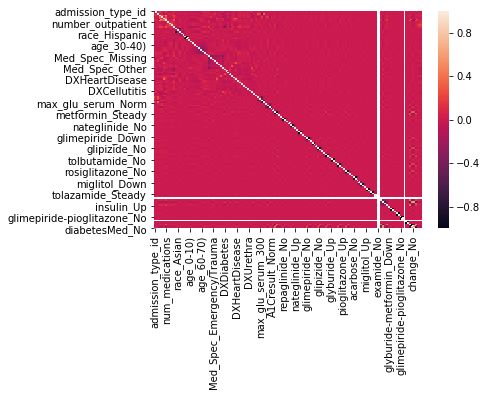

In [57]:
sb.heatmap(data_new.corr())

In [58]:
data_new.describe()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,age_0-10),age_10-20),age_20-30),age_30-40),age_40-50),age_50-60),age_60-70),...,tolazamide_Steady,tolazamide_Up,examide_No,citoglipton_No,insulin_Down,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_Down,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_No,glipizide-metformin_Steady,glimepiride-pioglitazone_No,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_No,metformin-pioglitazone_No,metformin-pioglitazone_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,readmitted30,readmittedYN
count,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,...,99492.000000,99492.00000,99492.0,99492.0,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.00000,99492.00000,99492.0,99492.00000,99492.00000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000
mean,2.027238,3.740884,5.770997,4.398454,43.072971,1.340540,16.026545,0.373357,0.201343,0.643107,7.439251,0.193081,0.006443,0.764876,0.020474,0.015127,0.538486,0.461514,0.001608,0.006855,0.016192,0.037179,0.095133,0.169813,0.221003,...,0.000382,0.00001,1.0,1.0,0.121005,0.467324,0.300547,0.111125,0.000030,0.993165,0.006744,0.000060,0.999869,0.000131,0.99999,0.00001,1.0,0.99999,0.00001,0.461444,0.538556,0.231184,0.768816,0.112260,0.464118
std,1.450861,5.309413,4.072906,2.986972,19.695587,1.703686,8.119809,1.276805,0.939981,1.271370,1.926043,0.394718,0.080008,0.424079,0.141616,0.122058,0.498519,0.498519,0.040070,0.082510,0.126215,0.189201,0.293400,0.375470,0.414924,...,0.019540,0.00317,0.0,0.0,0.326134,0.498934,0.458498,0.314288,0.005491,0.082390,0.081846,0.007766,0.011430,0.011430,0.00317,0.00317,0.0,0.00317,0.00317,0.498514,0.498514,0.421592,0.421592,0.315688,0.498713
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,1.0,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.00000,0.00000,1.0,1.00000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.00000,0.00000,1.0,1.00000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,1.0,1.0,0.000000,1.000000,1.000000,0.000000,0.000000,1.0

In [59]:
data_new.dtypes[data_new.dtypes == 'object']

readmitted    object
dtype: object

In [60]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99492 entries, 0 to 101765
Columns: 138 entries, admission_type_id to readmittedYN
dtypes: int32(16), int64(22), object(1), uint8(99)
memory usage: 33.7+ MB


In [61]:
data_new.columns

Index(['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient',
       ...
       'glimepiride-pioglitazone_Steady', 'metformin-rosiglitazone_No',
       'metformin-pioglitazone_No', 'metformin-pioglitazone_Steady',
       'change_Ch', 'change_No', 'diabetesMed_No', 'diabetesMed_Yes',
       'readmitted30', 'readmittedYN'],
      dtype='object', length=138)

# Standardization/Create X and Y

In [62]:
#data_new = data_new.select_dtypes(include=['int32', 'int64'])

# create X dataframe without readmitted output column
X = data_new.drop(['readmitted30', 'readmittedYN', 'readmitted'], axis=1)
#X = data_new.drop(['readmitted30', 'readmittedYN'], axis=1)

# create y dataframe with readmitted output column
y = data_new['readmitted30']

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [63]:
cols = X.columns
cols

Index(['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient',
       ...
       'glipizide-metformin_Steady', 'glimepiride-pioglitazone_No',
       'glimepiride-pioglitazone_Steady', 'metformin-rosiglitazone_No',
       'metformin-pioglitazone_No', 'metformin-pioglitazone_Steady',
       'change_Ch', 'change_No', 'diabetesMed_No', 'diabetesMed_Yes'],
      dtype='object', length=135)

In [64]:
cols = X_scaled.columns
cols

Index(['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient',
       ...
       'glipizide-metformin_Steady', 'glimepiride-pioglitazone_No',
       'glimepiride-pioglitazone_Steady', 'metformin-rosiglitazone_No',
       'metformin-pioglitazone_No', 'metformin-pioglitazone_Steady',
       'change_Ch', 'change_No', 'diabetesMed_No', 'diabetesMed_Yes'],
      dtype='object', length=135)

In [65]:
X.head()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,age_0-10),age_10-20),age_20-30),age_30-40),age_40-50),age_50-60),age_60-70),...,troglitazone_Steady,tolazamide_No,tolazamide_Steady,tolazamide_Up,examide_No,citoglipton_No,insulin_Down,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_Down,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_No,glipizide-metformin_Steady,glimepiride-pioglitazone_No,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_No,metformin-pioglitazone_No,metformin-pioglitazone_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes
0,6,25,1,1,41,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,0
1,1,1,7,3,59,0,18,0,0,0,9,0,0,1,0,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0,0,1
2,1,1,7,2,11,5,13,2,0,1,6,1,0,0,0,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,1,1,0,0,1,0,1
3,1,1,7,2,44,1,16,0,0,0,7,0,0,1,0,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0,0,1
4,1,1,7,1,51,0,8,0,0,0,5,0,0,1,0,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,1,1,0,1,0,0,1


In [66]:
X_scaled.head()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,age_0-10),age_10-20),age_20-30),age_30-40),age_40-50),age_50-60),age_60-70),...,troglitazone_Steady,tolazamide_No,tolazamide_Steady,tolazamide_Up,examide_No,citoglipton_No,insulin_Down,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_Down,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_No,glipizide-metformin_Steady,glimepiride-pioglitazone_No,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_No,metformin-pioglitazone_No,metformin-pioglitazone_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes
0,2.738224,4.004063,-1.171405,-1.137765,-0.105251,-0.786851,-1.850613,-0.292416,-0.2142,-0.505840,-3.343272,-0.489164,-0.080526,0.554439,-0.144575,-0.123932,0.925775,-0.925775,24.916360,-0.083079,-0.128292,-0.196506,-0.324245,-0.452269,-0.532636,...,-0.005491,0.019803,-0.019547,-0.00317,0.0,0.0,-0.371029,1.067634,-0.655506,-0.353577,-0.005491,0.082956,-0.082402,-0.007766,0.011432,-0.011432,0.00317,-0.00317,0.0,0.00317,-0.00317,-0.925644,0.925644,1.823609,-1.823609
1,-0.708024,-0.516234,0.301753,-0.468187,0.808664,-0.786851,0.243043,-0.292416,-0.2142,-0.505840,0.810344,-0.489164,-0.080526,0.554439,-0.144575,-0.123932,0.925775,-0.925775,-0.040134,12.036723,-0.128292,-0.196506,-0.324245,-0.452269,-0.532636,...,-0.005491,0.019803,-0.019547,-0.00317,0.0,0.0,-0.371029,-0.936650,-0.655506,2.828235,-0.005491,0.082956,-0.082402,-0.007766,0.011432,-0.011432,0.00317,-0.00317,0.0,0.00317,-0.00317,1.080328,-1.080328,-0.548363,0.548363
2,-0.708024,-0.516234,0.301753,-0.802976,-1.628443,2.147977,-0.372738,1.274002,-0.2142,0.280717,-0.747262,2.044304,-0.080526,-1.803626,-0.144575,-0.123932,0.925775,-0.925775,-0.040134,-0.083079,7.794736,-0.196506,-0.324245,-0.452269,-0.532636,...,-0.005491,0.019803,-0.019547,-0.00317,0.0,0.0,-0.371029,1.067634,-0.655506,-0.353577,-0.005491,0.082956,-0.082402,-0.007766,0.011432,-0.011432,0.00317,-0.00317,0.0,0.00317,-0.00317,-0.925644,0.925644,-0.548363,0.548363
3,-0.708024,-0.516234,0.301753,-0.802976,0.047068,-0.199885,-0.003269,-0.292416,-0.2142,-0.505840,-0.228060,-0.489164,-0.080526,0.554439,-0.144575,-0.123932,-1.080176,1.080176,-0.040134,-0.083079,-0.128292,5.088909,-0.324245,-0.452269,-0.532636,...,-0.005491,0.019803,-0.019547,-0.00317,0.0,0.0,-0.371029,-0.936650,-0.655506,2.828235,-0.005491,0.082956,-0.082402,-0.007766,0.011432,-0.011432,0.00317,-0.00317,0.0,0.00317,-0.00317,1.080328,-1.080328,-0.548363,0.548363
4,-0.708024,-0.516234,0.301753,-1.137765,0.402479,-0.786851,-0.988519,-0.292416,-0.2142,-0.505840,-1.266464,-0.489164,-0.080526,0.554439,-0.144575,-0.123932,-1.080176,1.080176,-0.040134,-0.083079,-0.128292,-0.196506,3.084083,-0.452269,-0.532636,...,-0.005491,0.019803,-0.019547,-0.00317,0.0,0.0,-0.371029,-0.936650,1.525539,-0.353577,-0.005491,0.082956,-0.082402,-0.007766,0.011432,-0.011432,0.00317,-0.00317,0.0,0.00317,-0.00317,1.080328,-1.080328,-0.548363,0.548363


# PCA

In [67]:
pca = PCA(n_components=0.9)
m = pca.fit_transform(X_scaled)

In [68]:
df = pd.DataFrame(m)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84
0,-3.977396,2.445607,-0.837380,-1.579464,0.452278,0.398907,0.805814,-0.113410,-0.328299,-0.127622,1.024284,0.747174,0.136132,-0.019359,-0.094847,0.275395,0.011578,-0.393403,-0.079794,0.120494,-0.012514,0.617995,-1.027971,-3.010344,-3.269586,...,-3.103939,-4.855751,-2.144537,1.480918,1.106770,-1.068857,-1.196268,2.727905,1.759081,0.977528,-2.950421,-4.820311,-2.887115,-2.056174,1.004104,-0.217149,1.796892,-3.492451,2.952306,0.933779,-2.344585,-4.056034,6.356901,-1.514244,-2.883435
1,1.209734,-1.877701,-0.235906,-1.961752,-0.741736,0.454223,-0.167130,0.290171,-0.585947,0.287744,-0.458755,0.714102,-0.006337,0.014602,-0.074322,0.083818,-0.125058,0.173459,-0.310187,0.165958,-0.102099,-0.685951,0.097356,-1.049718,-2.861419,...,1.046277,3.353644,-0.223781,-2.127984,0.118854,0.343005,0.007449,-1.395939,1.021119,-0.425589,0.829371,-0.773864,-1.790744,-0.279161,1.486511,-0.467259,0.700820,-1.305006,0.169805,0.522443,-0.470930,-2.325864,1.657048,-2.891052,-0.760709
2,-1.045707,1.065427,-1.239926,-2.196401,1.485877,-0.510157,-2.847217,-0.306976,1.245061,0.376807,0.460868,-0.232192,-0.085751,0.147267,-0.051437,0.057864,0.122250,-0.147421,0.430648,-0.712902,-0.876554,0.166876,0.472362,0.054272,0.324117,...,-0.228628,-0.531331,0.522428,1.721244,-1.711919,-0.468535,-0.169935,0.466929,-1.473808,0.796770,1.561798,0.457745,0.344747,-0.257610,-0.529169,0.614360,-1.125327,0.627867,-0.908408,0.055128,1.331739,-0.196931,-0.690939,0.413241,0.071050
3,1.055857,-1.209226,-0.204400,-0.592753,0.634129,-0.719378,0.657773,0.949166,-0.406860,0.074096,-0.516434,-0.318688,-0.087757,0.102380,0.131843,-0.138285,0.167182,0.238988,0.095445,-0.013112,-0.055855,-1.097150,1.420154,1.428991,-1.833188,...,-0.037051,-0.078444,-0.070209,-0.158797,0.278552,-0.291287,-0.008399,0.039302,-0.373875,-0.318214,0.308263,-0.115731,0.318515,-0.517199,-0.341862,0.430861,-0.077785,0.399838,-0.558347,0.226690,-0.295978,0.429982,-0.987976,-0.657984,-0.183727
4,1.339391,1.419524,-0.392739,-0.934718,2.080885,-1.295639,-2.588615,-0.052564,-0.882817,0.622509,-1.334849,0.403152,-0.284249,0.195330,-0.078172,0.056898,0.081875,0.664119,0.146761,0.682946,-0.479463,-1.617677,1.204471,-0.535871,-0.268157,...,-0.059775,0.008189,0.063754,0.154120,-0.051988,-0.113868,0.063860,0.315307,-0.180862,0.113589,-0.092019,-0.124087,-0.148904,-0.405345,0.130622,0.017574,0.186772,0.008522,-0.061255,-0.240973,0.004907,0.483279,-0.348196,-0.546872,0.150765


In [69]:
pca.explained_variance_ratio_

array([0.0358573 , 0.02216482, 0.02070993, 0.01932965, 0.0170289 ,
       0.01666133, 0.0163829 , 0.01628543, 0.01578266, 0.01561051,
       0.01533609, 0.01522713, 0.0151934 , 0.01516734, 0.01515856,
       0.01515277, 0.01514561, 0.01510499, 0.01508568, 0.01500224,
       0.01490762, 0.0147404 , 0.01456005, 0.01358628, 0.01323708,
       0.01248819, 0.01192152, 0.01171649, 0.01051411, 0.01032355,
       0.00989484, 0.00954072, 0.00929772, 0.00911341, 0.00903164,
       0.00891241, 0.00863243, 0.00860019, 0.00852571, 0.00828591,
       0.0082527 , 0.00816135, 0.00814295, 0.00804078, 0.00799051,
       0.00797827, 0.00788342, 0.00781911, 0.00781709, 0.00779015,
       0.00774953, 0.00772359, 0.00769681, 0.00768255, 0.00766625,
       0.00763973, 0.00761999, 0.00760872, 0.00759458, 0.00758701,
       0.00758316, 0.00758177, 0.00757479, 0.00756734, 0.00756055,
       0.00755187, 0.00752677, 0.0075131 , 0.00750017, 0.00749375,
       0.00747957, 0.00745049, 0.00742495, 0.00739469, 0.00734

In [70]:
print(pca.components_)

[[-0.00577534 -0.00766401 -0.01274112 ... -0.39357291 -0.37410147
   0.37410147]
 [ 0.16831635 -0.03727708 -0.02159188 ... -0.00363902 -0.02526994
   0.02526994]
 [ 0.26663483  0.08452821  0.3405301  ... -0.03952912 -0.01744071
   0.01744071]
 ...
 [-0.08588403  0.03051026  0.04792167 ... -0.00647467  0.00864205
  -0.00864205]
 [ 0.01479881 -0.1088697  -0.0156584  ...  0.02620036  0.00507371
  -0.00507371]
 [-0.11844401 -0.33782145  0.05774139 ... -0.01756732  0.03778646
  -0.03778646]]


In [71]:
print(m[0:5,:])

[[-3.97739603e+00  2.44560679e+00 -8.37379647e-01 -1.57946410e+00
   4.52278447e-01  3.98907260e-01  8.05813694e-01 -1.13410406e-01
  -3.28299007e-01 -1.27621815e-01  1.02428365e+00  7.47174005e-01
   1.36131957e-01 -1.93594712e-02 -9.48467399e-02  2.75395214e-01
   1.15783432e-02 -3.93403167e-01 -7.97944198e-02  1.20494226e-01
  -1.25144748e-02  6.17995158e-01 -1.02797082e+00 -3.01034396e+00
  -3.26958551e+00 -1.75162658e+00 -4.36315079e+00 -1.81449209e+00
  -2.32158216e+00  1.04819359e+00 -4.42307724e-01 -1.18702275e+00
  -5.49313579e-01  4.16859663e+00  2.28740648e+00 -4.69530281e+00
  -6.45948919e-01 -1.00177659e+00  7.99228717e-01 -1.52305251e+00
   1.23071332e+00 -6.22894520e-03  3.37393657e-01 -2.37908755e+00
  -1.65285832e+00 -1.10376524e+00 -1.14609597e+00 -3.31083851e+00
   1.95653590e+00  3.92080391e+00 -1.15834610e+00 -8.97386546e-01
  -3.38260982e+00  8.22888076e-01  1.97859875e+00 -9.80169372e+00
   1.02279340e+01  4.38647307e+00  5.41967349e+00  3.10563501e+00
  -3.10393

In [72]:
pdf = pd.concat([df[[0,1]], data_prep[['readmitted30']]], axis = 1)

In [73]:
print(pdf.head())
pdf.readmitted30.value_counts()

          0         1  readmitted30
0 -3.977396  2.445607           0.0
1  1.209734 -1.877701           0.0
2 -1.045707  1.065427           0.0
3  1.055857 -1.209226           0.0
4  1.339391  1.419524           0.0


0.0    88323
1.0    11169
Name: readmitted30, dtype: int64

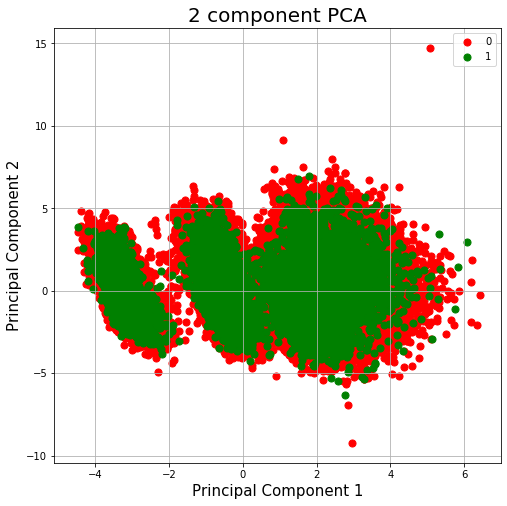

In [74]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = pdf['readmitted30'] == target
    ax.scatter(pdf.loc[indicesToKeep, 0], pdf.loc[indicesToKeep, 1], c = color, s = 50)
ax.legend(targets)
ax.grid()

In [75]:
from collections import Counter
print("readmitted30")
print(Counter(data_new['readmitted30']))
print(" ")
print("readmittedYN")
print(Counter(data_new['readmittedYN']))

readmitted30
Counter({0: 88323, 1: 11169})
 
readmittedYN
Counter({0: 53316, 1: 46176})


In [76]:
most_important = [np.abs(pca.components_[i]).argmax() for i in range(pca.components_.shape[0])]

# Need to reselect feature_names

In [77]:
feature_names = cols

In [78]:
most_important_names = [feature_names[most_important[i]] for i in range(pca.components_.shape[0])]

In [79]:
most_important_names

['change_No',
 'number_diagnoses',
 'max_glu_serum_None',
 'race_Caucasian',
 'glyburide_No',
 'glimepiride_No',
 'glipizide_No',
 'rosiglitazone_No',
 'A1Cresult_None',
 'glipizide-metformin_No',
 'repaglinide_No',
 'chlorpropamide_No',
 'metformin-pioglitazone_No',
 'tolazamide_No',
 'glimepiride-pioglitazone_No',
 'acetohexamide_No',
 'tolbutamide_No',
 'metformin-pioglitazone_No',
 'troglitazone_Steady',
 'acarbose_No',
 'nateglinide_No',
 'glipizide-metformin_Steady',
 'A1Cresult_None',
 'insulin_Steady',
 'race_Caucasian',
 'rosiglitazone_No',
 'Med_Spec_Other',
 'Med_Spec_Missing',
 'Med_Spec_Missing',
 'DXHTN_Kidney',
 'age_70-80)',
 'age_60-70)',
 'number_emergency',
 'DXFluid',
 'Med_Spec_InternalMedicine',
 'Med_Spec_Emergency/Trauma',
 'age_50-60)',
 'insulin_Up',
 'Med_Spec_Family/GeneralPractice',
 'glyburide_Up',
 'DXCellutitis',
 'metformin_Down',
 'age_30-40)',
 'age_90-100)',
 'A1Cresult_Norm',
 'A1Cresult_7',
 'glipizide_Up',
 'age_30-40)',
 'age_20-30)',
 'race_Hisp

# Feature selection

['number_diagnoses',
 'num_procedures',
 'Med_Spec_Other',
 'time_in_hospital',
 'Med_Spec_Nephrology',
 'Med_Spec_InternalMedicine',
 'Med_Spec_Family/GeneralPractice',
 'Med_Spec_Family/GeneralPractice',
 'Med_Spec_Surgery-General',
 'DXPneumonia',
 'DXCellutitis',
 'DXCellutitis',
 'DXCVD',
 'DXCVD',
 'DXResp',
 'DXLipid',
 'DXDevice',
 'DXUrethra',
 'number_outpatient',
 'DXHeartAttack',
 'DXHeartFailure',
 'DXHypertension',
 'DXHeartAttack',
 'DXDiabetes',
 'Med_Spec_Cardiology',
 'number_inpatient',
 'num_lab_procedures']

In [80]:
xvector = pca.components_[0]
yvector = pca.components_[1]

In [81]:
xs = m[:,0]
ys = m[:,1]

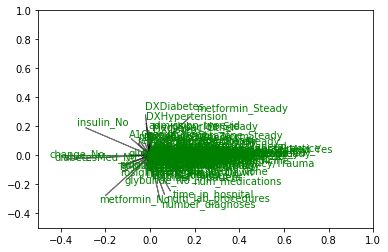

In [82]:
# scalex = 1.0/(xs.max() - xs.min())
# scaley = 1.0/(ys.max() - ys.min())
# classes = np.unique(pdf['readmitted'])
# colors = ['g','r','w']
# for s, l in enumerate(classes):
#    plt.scatter(xs, ys, c = colors[s])

for i in range(len(xvector)):
# arrows project features as vectors onto PC axes
    plt.arrow(0, 0, xvector[i], yvector[i], color='k', alpha=0.5)
    plt.text(xvector[i]*1.15, yvector[i]*1.15, feature_names[i], color='g')

plt.xlim(-.5,1)
plt.ylim(-.5,1)

plt.show()

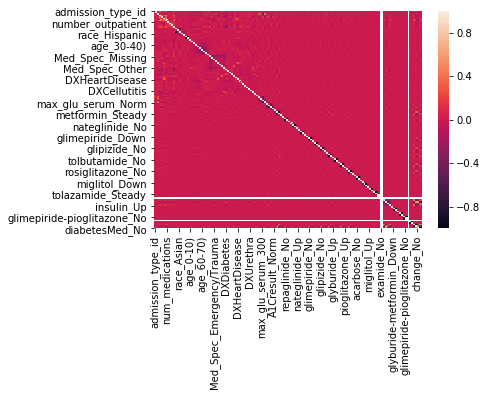

In [83]:
sb.heatmap(X_scaled.corr())

In [84]:
def select_features(x,y):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(x,y)
    x_fs = fs.transform(x)
    return x_fs, fs

In [114]:
#oe = OrdinalEncoder()
#oe.fit(X)
#X_enc = oe.transform(X)

In [115]:
#le = LabelEncoder()
#le.fit(y)
#y_enc = le.transform(y)

In [85]:
X_fs, fs = select_features(X,y)

Feature admission_type_id: 14.145452
Feature discharge_disposition_id: 1921.881652
Feature admission_source_id: 7.652824
Feature time_in_hospital: 396.940690
Feature num_lab_procedures: 375.878773
Feature num_procedures: 29.340813
Feature num_medications: 637.830391
Feature number_outpatient: 154.381859
Feature number_emergency: 1617.922472
Feature number_inpatient: 6852.324144
Feature number_diagnoses: 122.177865
Feature race_AfricanAmerican: 0.001207
Feature race_Asian: 0.758061
Feature race_Caucasian: 0.317949
Feature race_Hispanic: 1.369579
Feature race_Other: 3.824946
Feature gender_Female: 0.407689
Feature gender_Male: 0.475684
Feature age_0-10): 14.038701
Feature age_10-20): 19.667636
Feature age_20-30): 16.295273
Feature age_30-40): 0.123569
Feature age_40-50): 3.039361
Feature age_50-60): 37.309722
Feature age_60-70): 0.000176
Feature age_70-80): 9.955028
Feature age_80-90): 12.048205
Feature age_90-100): 0.053109
Feature Med_Spec_Missing: 9.735311
Feature Med_Spec_InternalMed

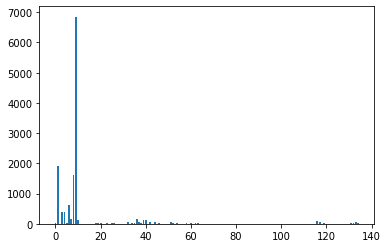

In [86]:
# create dataframe to store model features and chi2 scores
topdf = pd.DataFrame(columns=('Features', 'Scores'))

for i in range(len(fs.scores_)):
    print('Feature %s: %f' % (X.columns[i], fs.scores_[i]))
    topdf = topdf.append({'Features':data_new.columns[i], 'Scores':fs.scores_[i]},\
                                   ignore_index=True)

# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [87]:
topdf.sort_values(by=['Scores'], ascending=False)

,Features,Scores
9,number_inpatient,6852.324144
1,discharge_disposition_id,1921.881652
8,number_emergency,1617.922472
6,num_medications,637.830391
3,time_in_hospital,396.940690
4,num_lab_procedures,375.878773
36,Med_Spec_Other,166.080287
7,number_outpatient,154.381859
39,DXFluid,123.129051
10,number_diagnoses,122.177865


# Train/Test Split - All Columns

In [88]:
# perform train and test split while setting a random state seed
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

# Print shape of both train and split 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(69644, 135)
(69644,)
(29848, 135)
(29848,)


In [89]:
y_train.value_counts()

0    61768
1     7876
Name: readmitted30, dtype: int64

# Oversampling train - All Columns

In [90]:
# transform the dataset due to the imbalance issue using SMOTE

# sampling strategy allows us to pick ratio of minority oversampling over majority. 1.0 = 50/50
oversample = SMOTE(sampling_strategy='auto')
#undersample = RandomUnderSampler(sampling_strategy=1.0)

# fit x_train and y_train to oversampling object
#X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)
#X_train_smote, y_train_smote = undersample.fit_resample(X_train_smote, y_train_smote)

X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

In [91]:
y_train_smote.value_counts()

1    61768
0    61768
Name: readmitted30, dtype: int64

# Undersampling train - All columns

In [92]:
# transform the dataset due to the imbalance issue using undersampling

# sampling strategy allows us to pick ratio of minority oversampling over majority. 1.0 = 50/50
#oversample = SMOTE(sampling_strategy=0.2)
undersample = RandomUnderSampler(sampling_strategy=1.0)

# fit x_train and y_train to oversampling object
#X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)
#X_train_smote, y_train_smote = undersample.fit_resample(X_train_smote, y_train_smote)

X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

In [93]:
y_train_under.value_counts()

1    7876
0    7876
Name: readmitted30, dtype: int64

In [94]:
X.to_pickle("X")
X_scaled.to_pickle("X_scaled")
y.to_pickle("y")
topdf.to_pickle("topdf")
X_train.to_pickle("X_train")
y_train.to_pickle("y_train")
X_test.to_pickle("X_test")
y_test.to_pickle("y_test")
X_train_smote.to_pickle("X_train_smote")
y_train_smote.to_pickle("y_train_smote")
X_train_under.to_pickle("X_train_under")
y_train_under.to_pickle("y_train_under")

In [3]:
import pickle
X = pickle.load(open("X", "rb"))
X_scaled = pickle.load(open("X_scaled", "rb" ))
y = pickle.load(open("y", "rb"))
topdf = pickle.load(open("topdf", "rb" ))
X_train = pickle.load(open("X_train", "rb"))
y_train= pickle.load(open("y_train", "rb" ))
X_test = pickle.load(open("X_test", "rb"))
y_test = pickle.load(open("y_test", "rb" ))
X_train_smote = pickle.load(open("X_train_smote", "rb"))
y_train_smote = pickle.load(open("y_train_smote", "rb"))
X_train_under = pickle.load(open("X_train_under", "rb"))
y_train_under = pickle.load(open("y_train_under", "rb" ))

In [4]:
y_train.value_counts()

0    61768
1     7876
Name: readmitted30, dtype: int64

In [5]:
y_train_smote.value_counts()

1    61768
0    61768
Name: readmitted30, dtype: int64

In [6]:
y_train_under.value_counts()

1    7876
0    7876
Name: readmitted30, dtype: int64

# Train/Test Split - Top Columns from CHI2

In [7]:
top10featdf = topdf.nlargest(40,'Scores')

In [8]:
top10featdf['Features']

9                     number_inpatient
1             discharge_disposition_id
8                     number_emergency
6                      num_medications
3                     time_in_hospital
4                   num_lab_procedures
36                      Med_Spec_Other
7                    number_outpatient
39                             DXFluid
10                    number_diagnoses
40                      DXHypertension
116                     citoglipton_No
44                         DXDysrhythm
51                             DXOsteo
117                       insulin_Down
133                          change_No
32     Med_Spec_Family/GeneralPractice
37                          DXDiabetes
42                       DXHeartAttack
119                     insulin_Steady
63                        metformin_No
23                          age_40-50)
34            Med_Spec_Surgery-General
5                       num_procedures
35                 Med_Spec_Nephrology
131      metformin-piogli

In [9]:
X_TOP = X[top10featdf['Features']]

In [10]:
X_TOP.shape

(99492, 40)

In [11]:
# perform train and test split while setting a random state seed
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_TOP, y, test_size=0.3, random_state=42)

# Print shape of both train and split 
print(X_train_top.shape)
print(y_train_top.shape)
print(X_test_top.shape)
print(y_test_top.shape)

(69644, 40)
(69644,)
(29848, 40)
(29848,)


# Oversampling train - Top Columns from CHI2

In [12]:
# transform the dataset due to the imbalance issue using SMOTE

# sampling strategy allows us to pick ratio of minority oversampling over majority. 1.0 = 50/50
oversample = SMOTE(sampling_strategy='auto')
#undersample = RandomUnderSampler(sampling_strategy=1.0)

# fit x_train and y_train to oversampling object
#X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)
#X_train_smote, y_train_smote = undersample.fit_resample(X_train_smote, y_train_smote)

X_train_top_smote, y_train_top_smote = oversample.fit_resample(X_train_top, y_train_top)

# Undersampling train - Top Columns from CHI2

In [13]:
# transform the dataset due to the imbalance issue using SMOTE

# sampling strategy allows us to pick ratio of minority oversampling over majority. 1.0 = 50/50
#oversample = SMOTE(sampling_strategy=0.2)
undersample = RandomUnderSampler(sampling_strategy=1.0)

# fit x_train and y_train to oversampling object
#X_train_top_smote, y_train_top_smote = oversample.fit_resample(X_train, y_train)
#X_train_top_smote, y_train_top_smote = undersample.fit_resample(X_train_top_smote, y_train_top_smote)

X_train_top_under, y_train_top_under = undersample.fit_resample(X_train_top, y_train_top)

In [14]:
y_train_top.value_counts()

0    61788
1     7856
Name: readmitted30, dtype: int64

In [15]:
y_train_top_smote.value_counts()

1    61788
0    61788
Name: readmitted30, dtype: int64

In [16]:
y_train_top_under.value_counts()

1    7856
0    7856
Name: readmitted30, dtype: int64

In [17]:
X_train_top.to_pickle("X_train_top")
y_train_top.to_pickle("y_train_top")
X_test_top.to_pickle("X_test_top")
y_test_top.to_pickle("y_test_top")
X_train_top_smote.to_pickle("X_train_top_smote")
y_train_top_smote.to_pickle("y_train_top_smote")
X_train_top_under.to_pickle("X_train_top_under")
y_train_top_under.to_pickle("y_train_top_under")

In [7]:
import pickle
X_train_top = pickle.load(open("X_train_top", "rb"))
y_train_top = pickle.load(open("y_train_top", "rb" ))
X_test_top = pickle.load(open("X_test_top", "rb"))
y_test_top = pickle.load(open("y_test_top", "rb" ))
X_train_top_smote = pickle.load(open("X_train_top_smote", "rb"))
y_train_top_smote = pickle.load(open("y_train_top_smote", "rb"))
X_train_top_under = pickle.load(open("X_train_top_under", "rb"))
y_train_top_under = pickle.load(open("y_train_top_under", "rb" ))

In [8]:
y_train_top.value_counts()

0    61788
1     7856
Name: readmitted30, dtype: int64

In [9]:
y_train_top_smote.value_counts()

1    61788
0    61788
Name: readmitted30, dtype: int64

In [10]:
y_train_top_under.value_counts()

1    7856
0    7856
Name: readmitted30, dtype: int64

In [11]:
X_train_top_under.shape

(15712, 40)

# Random Forest - Base Model

In [12]:
# create randomforestclassifier model and fit it on train data
rnd_clf = RandomForestClassifier(random_state=0)

rnd_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [13]:
# predict on test data using model
y_pred_rf = []
y_pred_rf_prob = []

y_pred_rf = rnd_clf.predict(X_test)
y_pred_rf_prob = rnd_clf.predict_proba(X_test)

In [14]:
# create confusion matrix with y test against y predictions from model
confusion_matrix(y_test, y_pred_rf)

array([[26537,    18],
       [ 3264,    29]], dtype=int64)

In [15]:
# create classification report with y test against y predictions from model
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     26555
           1       0.62      0.01      0.02      3293

    accuracy                           0.89     29848
   macro avg       0.75      0.50      0.48     29848
weighted avg       0.86      0.89      0.84     29848



In [16]:
base_probs = []

# limit to probability for class = 1 
base_probs = y_pred_rf_prob[:,1]

# calculate roc_auc_score
print(roc_auc_score(y_test, base_probs))

0.623588495546632


In [17]:
feature_importances = pd.DataFrame(rnd_clf.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

                                 importance
num_lab_procedures                 0.092119
num_medications                    0.082089
time_in_hospital                   0.060005
number_inpatient                   0.051089
discharge_disposition_id           0.041906
...                                     ...
glimepiride-pioglitazone_Steady    0.000000
metformin-rosiglitazone_No         0.000000
chlorpropamide_Down                0.000000
acetohexamide_Steady               0.000000
acetohexamide_No                   0.000000

[135 rows x 1 columns]


In [18]:
# predict on train data using model
y_pred_rf_train = rnd_clf.predict(X_train)
y_pred_rf_prob_train = rnd_clf.predict_proba(X_train)

In [19]:
# create confusion matrix with y test against y predictions from model
confusion_matrix(y_train, y_pred_rf_train)

array([[61768,     0],
       [    2,  7874]], dtype=int64)

In [20]:
# create classification report with y test against y predictions from model
print(classification_report(y_train, y_pred_rf_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     61768
           1       1.00      1.00      1.00      7876

    accuracy                           1.00     69644
   macro avg       1.00      1.00      1.00     69644
weighted avg       1.00      1.00      1.00     69644



In [21]:
# limit to probability for class = 1 
base_probs_train = y_pred_rf_prob_train[:,1]

# calculate roc_auc_score
print(roc_auc_score(y_train, base_probs_train))

1.0


Model Commentary:
We get an ROC AUC Score for our base Random Forest model of 0.6236. We have a very low recall on the 1 class and high on 0 class due to our imbalance issue. We also see a lot of overfitting as the train ROC AUC score is perfect at 1.0 and test is only 0.624. We will try to use SMOTE, undersampling, and feature reduction to try and reduce the overfitting and also improve our predictions on the minority 1 class.

# Random Forest - Base Model (Smote)

In [170]:
# create randomforestclassifier model and fit it on train data
rnd_clf_smote = RandomForestClassifier(random_state=0)

#rnd_clf_smote.fit(X_train, y_train)
rnd_clf_smote.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=0)

In [171]:
# predict on test data using model
y_pred_rf_smote = []
y_pred_rf_prob_smote = []

y_pred_rf_smote = rnd_clf_smote.predict(X_test)
y_pred_rf_prob_smote = rnd_clf_smote.predict_proba(X_test)

In [172]:
# create confusion matrix with y test against y predictions from model
confusion_matrix(y_test, y_pred_rf_smote)

array([[26449,   106],
       [ 3223,    70]], dtype=int64)

In [173]:
# create classification report with y test against y predictions from model
print(classification_report(y_test, y_pred_rf_smote))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     26555
           1       0.40      0.02      0.04      3293

    accuracy                           0.89     29848
   macro avg       0.64      0.51      0.49     29848
weighted avg       0.84      0.89      0.84     29848



In [174]:
base_probs_smote = []

# limit to probability for class = 1 
base_probs_smote = y_pred_rf_prob_smote[:,1]

# calculate roc_auc_score
print(roc_auc_score(y_test, base_probs_smote))

0.6260054778046904


In [175]:
feature_importances_smote = pd.DataFrame(rnd_clf_smote.feature_importances_, index = X_train_smote.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances_smote)

                                   importance
number_inpatient                 1.042583e-01
discharge_disposition_id         7.627021e-02
num_procedures                   5.828184e-02
time_in_hospital                 5.818091e-02
number_diagnoses                 4.347083e-02
num_lab_procedures               3.875325e-02
num_medications                  3.837042e-02
admission_type_id                3.750252e-02
admission_source_id              3.407728e-02
number_emergency                 2.807108e-02
number_outpatient                2.687394e-02
Med_Spec_Missing                 2.642489e-02
DXDiabetes                       2.445839e-02
gender_Male                      2.349172e-02
gender_Female                    2.202017e-02
age_70-80)                       2.135869e-02
DXHeartFailure                   2.126053e-02
age_60-70)                       1.490839e-02
DXHeartDisease                   1.395209e-02
DXHypertension                   1.380040e-02
age_50-60)                       1

Model Commentary: We tried to use Smote to combat the imbalance issue with our minority 1 class but still see a low recall of 0.02.

# Random Forest - Randomized Search (Smote)

In [36]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [37]:
# Use the random grid to search for best hyperparameters

# create randomforestclassifier model and fit it on train data
rf2 = RandomForestClassifier(random_state=0)

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random2 = RandomizedSearchCV(estimator = rf2, param_distributions = random_grid, cv = 5, verbose=2, n_jobs = -1)

# Fit the random search model
#rf_random.fit(X_train, y_train)
rf_random2.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 26.9min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   verbose=2)

In [38]:
# Assign best parameters to variable using .best_params_
rf_random2_optimized_parms = rf_random2.best_params_

# Create best model using .best_estimator_
rf_random2_optimized = rf_random2.best_estimator_

In [39]:
#look at best parameters
rf_random2_optimized_parms

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': False}

In [40]:
# predict on test data using model
y_pred_rf_random2 = rf_random2_optimized.predict(X_test)
y_pred_rf_prob_random2 = rf_random2_optimized.predict_proba(X_test)

In [41]:
# create confusion matrix with y test against y predictions from model
confusion_matrix(y_test, y_pred_rf_random2)

array([[26493,    62],
       [ 3242,    51]], dtype=int64)

In [42]:
# create classification report with y test against y predictions from model
print(classification_report(y_test, y_pred_rf_random2))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     26555
           1       0.45      0.02      0.03      3293

    accuracy                           0.89     29848
   macro avg       0.67      0.51      0.49     29848
weighted avg       0.84      0.89      0.84     29848



In [43]:
# limit to probability for class = 1 
base_probs_random2 = y_pred_rf_prob_random2[:,1]

# calculate roc_auc_score
print(roc_auc_score(y_test, base_probs_random2))

0.6338463969862868


In [44]:
feature_importances_random2 = pd.DataFrame(rf_random2_optimized.feature_importances_, index = X_train_smote.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances_random2)

                                   importance
number_inpatient                 1.250105e-01
discharge_disposition_id         7.749178e-02
num_procedures                   6.298422e-02
time_in_hospital                 5.745510e-02
number_diagnoses                 4.694626e-02
admission_source_id              4.018007e-02
admission_type_id                3.966637e-02
num_medications                  3.020292e-02
num_lab_procedures               2.874094e-02
Med_Spec_Missing                 2.835455e-02
gender_Male                      2.788114e-02
number_emergency                 2.725173e-02
number_outpatient                2.687671e-02
DXDiabetes                       2.685360e-02
gender_Female                    2.662060e-02
age_70-80)                       2.289138e-02
DXHeartFailure                   2.137043e-02
age_60-70)                       1.629259e-02
DXHypertension                   1.597504e-02
age_50-60)                       1.319306e-02
DXHeartDisease                   1

Model Commemtary: We tried to hypertune the Random Forest model with Smote but the ROC AUC only slightly improved from 0.626 to 0.634 and the recall on the 1 class is still low at 0.02.

# Random Forest - Base Model (Undersampling)

In [176]:
# create randomforestclassifier model and fit it on train data
rnd_clf_under = RandomForestClassifier(random_state=0)

#rnd_clf_smote.fit(X_train, y_train)
rnd_clf_under.fit(X_train_under, y_train_under)

RandomForestClassifier(random_state=0)

In [177]:
# predict on test data using model
y_pred_rf_under = []
y_pred_rf_prob_under = []

y_pred_rf_under = rnd_clf_under.predict(X_test)
y_pred_rf_prob_under = rnd_clf_under.predict_proba(X_test)

In [178]:
# create confusion matrix with y test against y predictions from model
confusion_matrix(y_test, y_pred_rf_under)

array([[16405, 10150],
       [ 1414,  1879]], dtype=int64)

In [179]:
# create classification report with y test against y predictions from model
print(classification_report(y_test, y_pred_rf_under))

              precision    recall  f1-score   support

           0       0.92      0.62      0.74     26555
           1       0.16      0.57      0.25      3293

    accuracy                           0.61     29848
   macro avg       0.54      0.59      0.49     29848
weighted avg       0.84      0.61      0.68     29848



In [180]:
base_probs_under = []

# limit to probability for class = 1 
base_probs_under = y_pred_rf_prob_under[:,1]

# calculate roc_auc_score
print(roc_auc_score(y_test, base_probs_under))

0.6386759015875182


In [181]:
feature_importances_under = pd.DataFrame(rnd_clf_under.feature_importances_, index = X_train_under.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances_under)

                                 importance
num_lab_procedures                 0.085146
num_medications                    0.076247
time_in_hospital                   0.057887
number_inpatient                   0.054395
discharge_disposition_id           0.044746
num_procedures                     0.039462
number_diagnoses                   0.038922
admission_type_id                  0.028633
admission_source_id                0.024788
number_outpatient                  0.019495
number_emergency                   0.016183
Med_Spec_Missing                   0.015315
gender_Female                      0.014896
gender_Male                        0.014452
age_70-80)                         0.014341
age_60-70)                         0.013454
DXHeartFailure                     0.013394
race_Caucasian                     0.012463
DXFluid                            0.012117
age_80-90)                         0.011862
DXDysrhythm                        0.011569
age_50-60)                      

Model Commentary: We tried to undersample instead of SMOTE and while the ROC AUC score was about the same we were finally able to predict the minority 1 class better with a recall score of 0.57.

# Random Forest - Randomized Search (Undersampling)

In [188]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [189]:
# Use the random grid to search for best hyperparameters

# create randomforestclassifier model and fit it on train data
rf = RandomForestClassifier(random_state=0)

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, n_jobs = -1)

# Fit the random search model
#rf_random.fit(X_train, y_train)
rf_random.fit(X_train_under, y_train_under)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 19.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 37.8min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   verbose=2)

In [190]:
# Assign best parameters to variable using .best_params_
rf_random_optimized_parms = rf_random.best_params_

# Create best model using .best_estimator_
rf_random_optimized = rf_random.best_estimator_

In [191]:
#look at best parameters
rf_random_optimized_parms

{'n_estimators': 2000,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

In [192]:
# predict on test data using model
y_pred_rf_random = rf_random_optimized.predict(X_test)
y_pred_rf_prob_random = rf_random_optimized.predict_proba(X_test)

In [193]:
# create confusion matrix with y test against y predictions from model
confusion_matrix(y_test, y_pred_rf_random)

array([[16304, 10251],
       [ 1302,  1991]], dtype=int64)

In [194]:
# create classification report with y test against y predictions from model
print(classification_report(y_test, y_pred_rf_random))

              precision    recall  f1-score   support

           0       0.93      0.61      0.74     26555
           1       0.16      0.60      0.26      3293

    accuracy                           0.61     29848
   macro avg       0.54      0.61      0.50     29848
weighted avg       0.84      0.61      0.69     29848



In [195]:
# limit to probability for class = 1 
base_probs_random = y_pred_rf_prob_random[:,1]

# calculate roc_auc_score
print(roc_auc_score(y_test, base_probs_random))

0.6532347333825715


In [196]:
feature_importances_random = pd.DataFrame(rf_random_optimized.feature_importances_, index = X_train_under.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances_random)

                                 importance
num_lab_procedures                 0.087863
num_medications                    0.078683
number_inpatient                   0.074920
time_in_hospital                   0.060083
discharge_disposition_id           0.054797
number_diagnoses                   0.040333
num_procedures                     0.040047
admission_type_id                  0.028343
admission_source_id                0.024331
number_outpatient                  0.019107
number_emergency                   0.018368
Med_Spec_Missing                   0.016122
gender_Female                      0.014759
gender_Male                        0.014741
age_70-80)                         0.014568
age_60-70)                         0.013247
DXHeartFailure                     0.012686
race_Caucasian                     0.012103
age_80-90)                         0.011429
age_50-60)                         0.011320
insulin_Steady                     0.011297
race_AfricanAmerican            

Model Commentary: We hypertuned the Random Forest model with undersampling and got a small boost in ROC AUC Score from 0.639 to 0.653.

# Random Forest - Top Features (Undersampling)

In [185]:
#feature_importances_under.reset_index(inplace=True)

In [272]:
#top10featdf = feature_importances2.nlargest(50,'importance')

In [ ]:
#top10featdf['index']

In [274]:
#X_TOP = X[top10featdf['index']]

In [13]:
# create randomforestclassifier model and fit it on top 10 features train data
rnd_clf_top = RandomForestClassifier()

rnd_clf_top = RandomForestClassifier(random_state=0)

rnd_clf_top.fit(X_train_top_under, y_train_top_under)

RandomForestClassifier(random_state=0)

In [14]:
# predict on test data using model
y_pred_rf_top = rnd_clf_top.predict(X_test_top)
y_pred_rf_prob_top = rnd_clf_top.predict_proba(X_test_top)

In [15]:
# create confusion matrix with y test against y predictions from model
confusion_matrix(y_test_top, y_pred_rf_top)

array([[16842,  9693],
       [ 1454,  1859]], dtype=int64)

In [16]:
# create classification report with y test against y predictions from model
print(classification_report(y_test_top, y_pred_rf_top))

              precision    recall  f1-score   support

           0       0.92      0.63      0.75     26535
           1       0.16      0.56      0.25      3313

    accuracy                           0.63     29848
   macro avg       0.54      0.60      0.50     29848
weighted avg       0.84      0.63      0.70     29848



In [17]:
# limit to probability for class = 1 
base_probs_top = y_pred_rf_prob_top[:,1]

# calculate roc_auc_score
print(roc_auc_score(y_test_top, base_probs_top))

0.6382095280931033


In [19]:
feature_importances_top = pd.DataFrame(rnd_clf_top.feature_importances_, index = X_train_top_under.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances_top)

                                 importance
num_lab_procedures                 0.142414
num_medications                    0.123024
time_in_hospital                   0.087638
number_inpatient                   0.064690
num_procedures                     0.061951
discharge_disposition_id           0.058518
number_diagnoses                   0.058194
admission_type_id                  0.048714
number_outpatient                  0.031084
gender_Male                        0.026995
age_70-80)                         0.023540
number_emergency                   0.023052
insulin_Steady                     0.021010
DXFluid                            0.016732
metformin_No                       0.016283
DXDysrhythm                        0.016230
A1Cresult_None                     0.016079
Med_Spec_Other                     0.013451
age_40-50)                         0.013342
change_Ch                          0.013042
DXDiabetes                         0.012941
Med_Spec_Family/GeneralPractice 

In [20]:
# predict on train data using model
y_pred_rf_top_train = rnd_clf_top.predict(X_train_top_under)
y_pred_rf_prob_top_train = rnd_clf_top.predict_proba(X_train_top_under)

In [21]:
# create confusion matrix with y test against y predictions from model
confusion_matrix(y_train_top_under, y_pred_rf_top_train)

array([[7856,    0],
       [   0, 7856]], dtype=int64)

In [22]:
# create classification report with y test against y predictions from model
print(classification_report(y_train_top_under, y_pred_rf_top_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7856
           1       1.00      1.00      1.00      7856

    accuracy                           1.00     15712
   macro avg       1.00      1.00      1.00     15712
weighted avg       1.00      1.00      1.00     15712



In [23]:
# limit to probability for class = 1 
base_probs_top_train = y_pred_rf_prob_top_train[:,1]

# calculate roc_auc_score
print(roc_auc_score(y_train_top_under, base_probs_top_train))

1.0


Model Commentary: We tried to limit our model to just the top features from our CHI Squared analysis and see if it helps with the overfitting but we got slightly worse results(0.638 vs 0.653 test ROC AUC Score) when compared to Random Forest with all features so will not use feature selection for final model and go with all columns from our data preprocessing results. Feature reduction did not help with overfitting either as train ROC AUC score is perfect at 1.0 while it is 0.653 for test.

# Random Forest - Final (Undersampling with Random Search Results)

In [199]:
# create randomforestclassifier model and fit it on train data
rf_final = RandomForestClassifier(random_state=0, bootstrap=True, n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_depth=None)

# Fit the model
#rf_final.fit(X_train, y_train)
rf_final.fit(X_train_under, y_train_under)

RandomForestClassifier(min_samples_leaf=2, n_estimators=2000, random_state=0)

In [200]:
# predict on test data using model
y_pred_rf_final = rf_final.predict(X_test)
y_pred_rf_prob_final = rf_final.predict_proba(X_test)

In [201]:
# create confusion matrix with y test against y predictions from model
confusion_matrix(y_test, y_pred_rf_final)

array([[16304, 10251],
       [ 1302,  1991]], dtype=int64)

In [202]:
# create classification report with y test against y predictions from model
print(classification_report(y_test, y_pred_rf_final))

              precision    recall  f1-score   support

           0       0.93      0.61      0.74     26555
           1       0.16      0.60      0.26      3293

    accuracy                           0.61     29848
   macro avg       0.54      0.61      0.50     29848
weighted avg       0.84      0.61      0.69     29848



In [203]:
# limit to probability for class = 1 
base_probs_final = y_pred_rf_prob_final[:,1]

# calculate roc_auc_score
print(roc_auc_score(y_test, base_probs_final))

0.6532347333825715


In [204]:
feature_importances_final = pd.DataFrame(rf_final.feature_importances_, index = X_train_under.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances_final)

                                 importance
num_lab_procedures                 0.087863
num_medications                    0.078683
number_inpatient                   0.074920
time_in_hospital                   0.060083
discharge_disposition_id           0.054797
number_diagnoses                   0.040333
num_procedures                     0.040047
admission_type_id                  0.028343
admission_source_id                0.024331
number_outpatient                  0.019107
number_emergency                   0.018368
Med_Spec_Missing                   0.016122
gender_Female                      0.014759
gender_Male                        0.014741
age_70-80)                         0.014568
age_60-70)                         0.013247
DXHeartFailure                     0.012686
race_Caucasian                     0.012103
age_80-90)                         0.011429
age_50-60)                         0.011320
insulin_Steady                     0.011297
race_AfricanAmerican            

In [205]:
# predict on train data using model
y_pred_rf_final_train = rf_final.predict(X_train_under)
y_pred_rf_prob_final_train = rf_final.predict_proba(X_train_under)

In [206]:
# create confusion matrix with y test against y predictions from model
confusion_matrix(y_train_under, y_pred_rf_final_train)

array([[7763,  113],
       [ 155, 7721]], dtype=int64)

In [207]:
# create classification report with y test against y predictions from model
print(classification_report(y_train_under, y_pred_rf_final_train))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      7876
           1       0.99      0.98      0.98      7876

    accuracy                           0.98     15752
   macro avg       0.98      0.98      0.98     15752
weighted avg       0.98      0.98      0.98     15752



In [208]:
# limit to probability for class = 1 
base_probs_final_train = y_pred_rf_prob_final_train[:,1]

# calculate roc_auc_score
print(roc_auc_score(y_train_under, base_probs_final_train))

0.9987746846047717


Model Commentary: Our final hypertuned Random Forest model with undersampling has a test ROC AUC score of 0.653 but we see a lot of overfitting as our ROC AUC score on train is 0.99 which is a big difference. While we were able to improve our recall score on the minority 1 class to 0.60 for test by undersampling, we could not bridge the gap between test and train by making the model less complex using feature selection and so these are the best results we came to for this model.

# ADA Boost - Smote

In [209]:
#create a dictionary of parameters 
param_grid = {'n_estimators':[100, 200, 300, 400, 500, 600, 700, 800],
'learning_rate':[0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4],              
'random_state':[0, 27, 42]}

# create Ada Boost model 
ab_obj=AdaBoostClassifier()

# Create gridsearch object with various combinations of parameters
ab_clf = RandomizedSearchCV(ab_obj, param_grid, cv = 5, scoring = 'roc_auc', refit = True, n_jobs=-1, verbose = 5)

In [210]:
ab_clf.fit(X_train_smote, y_train_smote.values.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed: 26.7min remaining:  2.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 27.0min finished


RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.2, 0.4, 0.6, 0.8, 1,
                                                          1.2, 1.4],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800],
                                        'random_state': [0, 27, 42]},
                   scoring='roc_auc', verbose=5)

In [211]:
print("Best parameter set found on training set:")
print()
print(ab_clf.best_params_)
print("Best estimator set found on training set:")
print()
print(ab_clf.best_estimator_)

# Save the best estimator statement for use below
ab_clf_best = ab_clf.best_estimator_
ab_clf_best

Best parameter set found on training set:

{'random_state': 27, 'n_estimators': 600, 'learning_rate': 0.6}
Best estimator set found on training set:

AdaBoostClassifier(learning_rate=0.6, n_estimators=600, random_state=27)


AdaBoostClassifier(learning_rate=0.6, n_estimators=600, random_state=27)

In [212]:
y_pred_test_ab = ab_clf_best.predict(X_test)

y_pred_class_test_ab = ab_clf_best.predict_proba(X_test)

In [213]:
print("TEST")
print(" ")
print("confusion matrix: ")
print(confusion_matrix(y_test,y_pred_test_ab))
print(" ")
print(" ")
print("classification report: ") 
print(classification_report(y_test,y_pred_test_ab))

TEST
 
confusion matrix: 
[[26314   241]
 [ 3163   130]]
 
 
classification report: 
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     26555
           1       0.35      0.04      0.07      3293

    accuracy                           0.89     29848
   macro avg       0.62      0.52      0.51     29848
weighted avg       0.83      0.89      0.84     29848



In [214]:
# limit to probability for class = 1 
base_probs_ab = y_pred_class_test_ab[:,1]

# calculate roc_auc_score
print("ROC AUC score (test): ", roc_auc_score(y_test, base_probs_ab))

ROC AUC score (test):  0.6312304739351424


In [215]:
y_pred_train_ab = ab_clf_best.predict(X_train_smote)

# limit to probability for class = 1 
y_pred_train_class_ab = ab_clf_best.predict_proba(X_train_smote)

base_probs_train_ab = y_pred_train_class_ab[:,1]

print("TRAIN")
print(" ")
print("confusion matrix: ")
print(confusion_matrix(y_train_smote,y_pred_train_ab))
print(" ")
print(" ")
print("classification report: ") 
print(classification_report(y_train_smote,y_pred_train_ab))

# calculate roc_auc_score
print("ROC AUC score (train): ",roc_auc_score(y_train_smote, base_probs_train_ab))

TRAIN
 
confusion matrix: 
[[61223   545]
 [ 8244 53524]]
 
 
classification report: 
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     61768
           1       0.99      0.87      0.92     61768

    accuracy                           0.93    123536
   macro avg       0.94      0.93      0.93    123536
weighted avg       0.94      0.93      0.93    123536

ROC AUC score (train):  0.9545936357086939


Model Commentary: ADA boost with Smote has similar results to Random Forest with Smote. The ROC AUC score is about the same as other models at 0.631 for test and again we see much overfitting as ROC AUC for train is 0.955. The recall on the minority class for test is also low at 0.04.

# ADA Boost - Undersampling

In [227]:
#create a dictionary of parameters 
param_grid = {'n_estimators':[100,200,300,400,500,600,700,800],
'learning_rate':[0.2,0.4,0.6,0.8,1, 1.2, 1.4],              
'random_state':[0,27,42]}

# create Ada Boost model 
abu_obj=AdaBoostClassifier()

# Create gridsearch object with various combinations of parameters
abu_clf = RandomizedSearchCV(abu_obj, param_grid, cv = 5, scoring = 'roc_auc', refit = True, n_jobs=-1, verbose = 5)

In [228]:
abu_clf.fit(X_train_under, y_train_under.values.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   57.8s
[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed:  3.3min remaining:   17.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.5min finished


RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.2, 0.4, 0.6, 0.8, 1,
                                                          1.2, 1.4],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800],
                                        'random_state': [0, 27, 42]},
                   scoring='roc_auc', verbose=5)

In [232]:
print("Best parameter set found on training set:")
print()
print(abu_clf.best_params_)
print("Best estimator set found on training set:")
print()
print(abu_clf.best_estimator_)

# Save the best estimator statement for use below
abu_clf_best = abu_clf.best_estimator_
abu_clf_best

Best parameter set found on training set:

{'random_state': 0, 'n_estimators': 200, 'learning_rate': 0.4}
Best estimator set found on training set:

AdaBoostClassifier(learning_rate=0.4, n_estimators=200, random_state=0)


AdaBoostClassifier(learning_rate=0.4, n_estimators=200, random_state=0)

In [233]:
y_pred_test_abu = abu_clf_best.predict(X_test)

y_pred_class_test_abu = abu_clf_best.predict_proba(X_test)

In [234]:
print("confusion matrix: ")
print(confusion_matrix(y_test,y_pred_test_abu))
print(" ")
print(" ")
print("classification report: ") 
print(classification_report(y_test,y_pred_test_abu))

confusion matrix: 
[[18004  8551]
 [ 1482  1811]]
 
 
classification report: 
              precision    recall  f1-score   support

           0       0.92      0.68      0.78     26555
           1       0.17      0.55      0.27      3293

    accuracy                           0.66     29848
   macro avg       0.55      0.61      0.52     29848
weighted avg       0.84      0.66      0.73     29848



In [235]:
# limit to probability for class = 1 
base_probs_abu = y_pred_class_test_abu[:,1]

# calculate roc_auc_score
print("ROC AUC score (test): ", roc_auc_score(y_test, base_probs_abu))

ROC AUC score (test):  0.6610817534990177


In [236]:
y_pred_train_abu = abu_clf_best.predict(X_train_under)

# limit to probability for class = 1 
y_pred_train_class_abu = abu_clf_best.predict_proba(X_train_under)

base_probs_train_abu = y_pred_train_class_abu[:,1]

print("confusion matrix: ")
print(confusion_matrix(y_train_under,y_pred_train_abu))
print(" ")
print(" ")
print("classification report: ") 
print(classification_report(y_train_under,y_pred_train_abu))

# calculate roc_auc_score
print("ROC AUC score (train): ",roc_auc_score(y_train_under, base_probs_train_abu))

confusion matrix: 
[[5432 2444]
 [3377 4499]]
 
 
classification report: 
              precision    recall  f1-score   support

           0       0.62      0.69      0.65      7876
           1       0.65      0.57      0.61      7876

    accuracy                           0.63     15752
   macro avg       0.63      0.63      0.63     15752
weighted avg       0.63      0.63      0.63     15752

ROC AUC score (train):  0.687640283846033


Model Commentary - ADA Boost with undersampling sees a big boost in recall for the minority 1 class from 0.04 to 0.55 just as with Random Forest and others. ROC AUC score gets a small boost when compared with smote from 0.631 to 0.661 on test. There is not as much overfitting with this model but the overall scores on test are similar to Random Forest and other models. 

# Ada Boost - Feature Selection

In [237]:
names = list(X_test.columns)

In [238]:
ada15 = pd.DataFrame(abu_clf_best.feature_importances_, index = names, columns=['importance']).nlargest(15, 'importance')

# not including patient_nbr so asked for 16

print(ada15)

#ADA15names = ['discharge_disposition_id', 'admission_type_id', 'Med_Spec_Missing', 'Med_Spec_InternalMedicine', 
#            'num_lab_procedures', 'Med_Spec_Other', 'Med_Spec_Emergency/Trauma', 'Med_Spec_Family/GeneralPractice', 
#            'Med_Spec_Cardiology', 'num_medications', 'Med_Spec_Surgery-General', 'number_inpatient', 
#            'Med_Spec_Nephrology', 'number_diagnoses', 'admission_source_id']

ADA15names = ['discharge_disposition_id', 'number_inpatient', 'Numeric_diag_1', 'Numeric_diag_3', 'time_in_hospital',        
              'number_diagnoses', 'Numeric_diag_2', 'number_emergency', 'num_medications', 'Med_Spec_Emergency/Trauma',
              'DXDiabetes', 'Med_Spec_Cardiology', 'DXHTN_Kidney', 'DXPneumonia', 'A1Cresult_None']       

ADA15names

                          importance
discharge_disposition_id       0.500
number_inpatient               0.050
num_medications                0.040
number_outpatient              0.035
number_emergency               0.030
time_in_hospital               0.025
num_lab_procedures             0.025
number_diagnoses               0.015
age_50-60)                     0.015
DXPneumonia                    0.015
admission_source_id            0.010
age_0-10)                      0.010
age_10-20)                     0.010
Med_Spec_Cardiology            0.010
DXLipid                        0.010


['discharge_disposition_id',
 'number_inpatient',
 'Numeric_diag_1',
 'Numeric_diag_3',
 'time_in_hospital',
 'number_diagnoses',
 'Numeric_diag_2',
 'number_emergency',
 'num_medications',
 'Med_Spec_Emergency/Trauma',
 'DXDiabetes',
 'Med_Spec_Cardiology',
 'DXHTN_Kidney',
 'DXPneumonia',
 'A1Cresult_None']

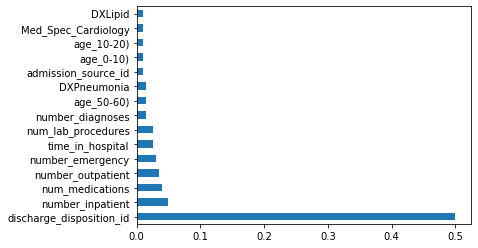

In [239]:
(pd.Series(abu_clf_best.feature_importances_, index=names)
   .nlargest(15)
   .plot(kind='barh'))

In [240]:
#feature importance

feature_importances = pd.DataFrame(abu_clf_best.feature_importances_,
                                   index = names,
                                   columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
discharge_disposition_id,0.500
number_inpatient,0.050
num_medications,0.040
number_outpatient,0.035
number_emergency,0.030
time_in_hospital,0.025
num_lab_procedures,0.025
DXPneumonia,0.015
number_diagnoses,0.015
age_50-60),0.015


In [241]:
ada15.reset_index(inplace=True)

In [242]:
X_train_ada15 = X_train_under[ada15['index']]
print(X_train_ada15.info())

X_test_ada15 = X_test[ada15['index']]
X_test_ada15 .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15752 entries, 0 to 15751
Data columns (total 15 columns):
discharge_disposition_id    15752 non-null float64
number_inpatient            15752 non-null float64
num_medications             15752 non-null float64
number_outpatient           15752 non-null float64
number_emergency            15752 non-null float64
time_in_hospital            15752 non-null float64
num_lab_procedures          15752 non-null float64
number_diagnoses            15752 non-null float64
age_50-60)                  15752 non-null float64
DXPneumonia                 15752 non-null float64
admission_source_id         15752 non-null float64
age_0-10)                   15752 non-null float64
age_10-20)                  15752 non-null float64
Med_Spec_Cardiology         15752 non-null float64
DXLipid                     15752 non-null float64
dtypes: float64(15)
memory usage: 1.8 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 29848 entries, 24247 to 88337


In [243]:
#create a dictionary of parameters 
param_grid = {'n_estimators':[100,200,300,400,500,600,700],
'learning_rate':[0.2,0.4,0.6,0.8,1, 1.2, 1.4],              
'random_state':[0,27,42]}

# create Ada Boost model 
ab_obj=AdaBoostClassifier()

# Create gridsearch object with various combinations of parameters
ab_clf15 = RandomizedSearchCV(ab_obj, param_grid, cv = 5, scoring = 'roc_auc', refit = True, n_jobs=-1, verbose = 5)

In [244]:
ab_clf15.fit(X_train_ada15, y_train_under.values.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed:  1.0min remaining:    5.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.1min finished


RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.2, 0.4, 0.6, 0.8, 1,
                                                          1.2, 1.4],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700],
                                        'random_state': [0, 27, 42]},
                   scoring='roc_auc', verbose=5)

In [245]:
print("Best parameter set found on training set:")
print()
print(ab_clf15.best_params_)
print("Best estimator set found on training set:")
print()
print(ab_clf15.best_estimator_)

# Save the best estimator statement for use below
ab_clf15_best = ab_clf15.best_estimator_
ab_clf15_best

Best parameter set found on training set:

{'random_state': 0, 'n_estimators': 500, 'learning_rate': 0.4}
Best estimator set found on training set:

AdaBoostClassifier(learning_rate=0.4, n_estimators=500, random_state=0)


AdaBoostClassifier(learning_rate=0.4, n_estimators=500, random_state=0)

In [246]:
y_pred_test_ab15 = ab_clf15_best.predict(X_test_ada15)

y_pred_class_test_ab15 = ab_clf15_best.predict_proba(X_test_ada15)

In [247]:
print("confusion matrix: ")
print(confusion_matrix(y_test,y_pred_test_ab15))
print(" ")
print(" ")
print("classification report: ") 
print(classification_report(y_test,y_pred_test_ab15))

confusion matrix: 
[[17798  8757]
 [ 1476  1817]]
 
 
classification report: 
              precision    recall  f1-score   support

           0       0.92      0.67      0.78     26555
           1       0.17      0.55      0.26      3293

    accuracy                           0.66     29848
   macro avg       0.55      0.61      0.52     29848
weighted avg       0.84      0.66      0.72     29848



In [248]:
# limit to probability for class = 1 
base_probs_ab15 = y_pred_class_test_ab15[:,1]

# calculate roc_auc_score
print("ROC AUC score (test): ",roc_auc_score(y_test, base_probs_ab15))

ROC AUC score (test):  0.6570974885361605


In [249]:
y_pred_train_ab15 = ab_clf15_best.predict(X_train_ada15)

# limit to probability for class = 1 
y_pred_train_class_ab15 = ab_clf15_best.predict_proba(X_train_ada15)

base_probs_train_ab15 = y_pred_train_class_ab15[:,1]

print("confusion matrix: ")
print(confusion_matrix(y_train_under,y_pred_train_ab15))
print(" ")
print(" ")
print("classification report: ") 
print(classification_report(y_train_under,y_pred_train_ab15))

# calculate roc_auc_score
print("ROC AUC score (train): ",roc_auc_score(y_train_under, base_probs_train_ab15))
# calculate accuracy
#print("Accuracy (train): ",metrics.accuracy(y_train_under, base_probs_train_ab))

confusion matrix: 
[[5363 2513]
 [3335 4541]]
 
 
classification report: 
              precision    recall  f1-score   support

           0       0.62      0.68      0.65      7876
           1       0.64      0.58      0.61      7876

    accuracy                           0.63     15752
   macro avg       0.63      0.63      0.63     15752
weighted avg       0.63      0.63      0.63     15752

ROC AUC score (train):  0.6852837264161284


Model Commentary - ADA Boost with feature selection did not change our results as we see a slightly lower ROC AUC Score of 0.657 for test vs 0.66 for undersampling test.

# Gradient Boost - Smote

In [250]:
#create a dictionary of parameters 
param_grid = {'n_estimators':[100,200,300,400,500,500],
'learning_rate':[0.1,0.2,0.4,0.6,0.8,1.2,1.6],              
'random_state':[0,27,42],
'max_depth': [1,2]}

# create Gradient Boost model 
gb_obj=GradientBoostingClassifier()

# Create gridsearch object with various combinations of parameters
gb_clf = RandomizedSearchCV(gb_obj, param_grid, cv = 5, scoring = 'roc_auc', refit = True, n_jobs=-1, verbose = 5)

In [251]:
gb_clf.fit(X_train_smote, y_train_smote.values.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed: 19.5min remaining:  1.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 19.6min finished


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.2, 0.4, 0.6,
                                                          0.8, 1.2, 1.6],
                                        'max_depth': [1, 2],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 500],
                                        'random_state': [0, 27, 42]},
                   scoring='roc_auc', verbose=5)

In [252]:
print("Best parameter set found on training set:")
print()
print(gb_clf.best_params_)
print("Best estimator set found on training set:")
print()
print(gb_clf.best_estimator_)

# Save the best estimator statement for use below
gb_clf_best = gb_clf.best_estimator_
gb_clf_best

Best parameter set found on training set:

{'random_state': 27, 'n_estimators': 100, 'max_depth': 2, 'learning_rate': 0.2}
Best estimator set found on training set:

GradientBoostingClassifier(learning_rate=0.2, max_depth=2, random_state=27)


GradientBoostingClassifier(learning_rate=0.2, max_depth=2, random_state=27)

In [253]:
y_pred_gb = gb_clf_best.predict(X_test)

y_pred_class_gb = gb_clf_best.predict_proba(X_test)

In [254]:
print("confusion matrix: ")
print(confusion_matrix(y_test,y_pred_gb))
print(" ")
print(" ")
print("classification report: ") 
print(classification_report(y_test,y_pred_gb))

confusion matrix: 
[[26457    98]
 [ 3246    47]]
 
 
classification report: 
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     26555
           1       0.32      0.01      0.03      3293

    accuracy                           0.89     29848
   macro avg       0.61      0.51      0.48     29848
weighted avg       0.83      0.89      0.84     29848



In [255]:
# limit to probability for class = 1 
base_probs_test_gb = y_pred_class_gb[:,1]

# calculate roc_auc_score
print("ROC AUC score (test): ",roc_auc_score(y_test, base_probs_test_gb))

ROC AUC score (test):  0.6309323629320921


In [256]:
y_pred_train_gb = gb_clf_best.predict(X_train_smote)

# limit to probability for class = 1 
y_pred_train_class_gb = gb_clf_best.predict_proba(X_train_smote)

base_probs_train_gb = y_pred_train_class_gb[:,1]

print("confusion matrix: ")
print(confusion_matrix(y_train_smote,y_pred_train_gb))
print(" ")
print(" ")
print("classification report: ") 
print(classification_report(y_train_smote,y_pred_train_gb))

# calculate roc_auc_score
print("ROC AUC score (train): ",roc_auc_score(y_train_smote, base_probs_train_gb))

confusion matrix: 
[[61573   195]
 [ 8582 53186]]
 
 
classification report: 
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     61768
           1       1.00      0.86      0.92     61768

    accuracy                           0.93    123536
   macro avg       0.94      0.93      0.93    123536
weighted avg       0.94      0.93      0.93    123536

ROC AUC score (train):  0.9545698739240775


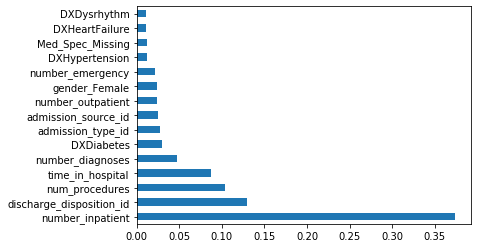

In [257]:
feat_importances = pd.Series(gb_clf_best.feature_importances_,names)
feat_importances.nlargest(15).plot(kind='barh')

Model Commentary: Gradient Boost with SMOTE is very similar to our previous models with SMOTE. The ROC AUC score is 0.631 and we see overfitting since ROC AUC score with train is 0.955. The recall on the minority 1 class is also very low at 0.01 for test.

# Gradient Boost - Undersampling

In [258]:
#create a dictionary of parameters 
param_grid = {'n_estimators':[100,200,300,400,500,500],
'learning_rate':[0.1,0.2,0.4,0.6,0.8,1.2,1.6],              
'random_state':[0,27,42],
'max_depth': [1,2]}

# create Ada Boost model 
gb_obj=GradientBoostingClassifier()

# Create gridsearch object with various combinations of parameters
gb_clf_u = RandomizedSearchCV(gb_obj, param_grid, cv = 5, scoring = 'roc_auc', refit = True, n_jobs=-1, verbose = 5)

In [259]:
gb_clf_u.fit(X_train_under, y_train_under.values.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed:  1.8min remaining:    9.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.8min finished


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.2, 0.4, 0.6,
                                                          0.8, 1.2, 1.6],
                                        'max_depth': [1, 2],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 500],
                                        'random_state': [0, 27, 42]},
                   scoring='roc_auc', verbose=5)

In [260]:
print("Best parameter set found on training set:")
print()
print(gb_clf_u.best_params_)
print("Best estimator set found on training set:")
print()
print(gb_clf_u.best_estimator_)

# Save the best estimator statement for use below
gb_clf_u_best = gb_clf_u.best_estimator_
gb_clf_u_best

Best parameter set found on training set:

{'random_state': 27, 'n_estimators': 200, 'max_depth': 2, 'learning_rate': 0.1}
Best estimator set found on training set:

GradientBoostingClassifier(max_depth=2, n_estimators=200, random_state=27)


GradientBoostingClassifier(max_depth=2, n_estimators=200, random_state=27)

In [261]:
y_pred_gbu = gb_clf_u_best.predict(X_test)

y_pred_class_gbu = gb_clf_u_best.predict_proba(X_test)

In [262]:
print("confusion matrix: ")
print(confusion_matrix(y_test,y_pred_gbu))
print(" ")
print(" ")
print("classification report: ") 
print(classification_report(y_test,y_pred_gbu))

confusion matrix: 
[[17013  9542]
 [ 1347  1946]]
 
 
classification report: 
              precision    recall  f1-score   support

           0       0.93      0.64      0.76     26555
           1       0.17      0.59      0.26      3293

    accuracy                           0.64     29848
   macro avg       0.55      0.62      0.51     29848
weighted avg       0.84      0.64      0.70     29848



In [263]:
# limit to probability for class = 1 
base_probs_test_gbu = y_pred_class_gbu[:,1]

# calculate roc_auc_score
print("ROC AUC score (test): ",roc_auc_score(y_test, base_probs_test_gbu))

ROC AUC score (test):  0.6630905105990734


In [264]:
y_pred_train_gbu = gb_clf_u_best.predict(X_train_under)

# limit to probability for class = 1 
y_pred_train_class_gbu = gb_clf_u_best.predict_proba(X_train_under)

base_probs_train_gbu = y_pred_train_class_gbu[:,1]

print("confusion matrix: ")
print(confusion_matrix(y_train_under,y_pred_train_gbu))
print(" ")
print(" ")
print("classification report: ") 
print(classification_report(y_train_under,y_pred_train_gbu))

# calculate roc_auc_score
print("ROC AUC score (train): ",roc_auc_score(y_train_under, base_probs_train_gbu))

confusion matrix: 
[[5246 2630]
 [2993 4883]]
 
 
classification report: 
              precision    recall  f1-score   support

           0       0.64      0.67      0.65      7876
           1       0.65      0.62      0.63      7876

    accuracy                           0.64     15752
   macro avg       0.64      0.64      0.64     15752
weighted avg       0.64      0.64      0.64     15752

ROC AUC score (train):  0.699173269991625


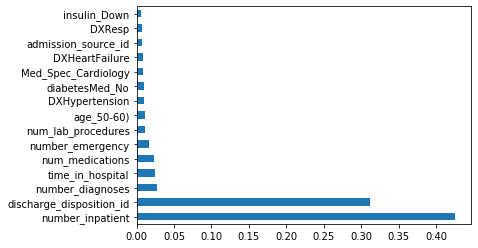

In [265]:
feat_importances = pd.Series(gb_clf_u_best.feature_importances_,names)
feat_importances.nlargest(15).plot(kind='barh')

Model Commentary: Gradient Boost with Undersampling acts very similar to our previous undersampling models. We see a big jump in recall for the minority 1 class to 0.59. The ROC AUC score for undersampling does not really change though compared to SMOTE (0.663 for test compared to 0.631 for SMOTE test. We do not see as much overfitting as undersampling train ROC AUC score is 0.7 vs 0.663 for undersampling test.

# Gradient Boost - Top 15 Features

In [266]:
gb15 = pd.DataFrame(gb_clf_u_best.feature_importances_, index = names, columns=['importance']).nlargest(15, 'importance')

gb15names = ['number_inpatient', 'discharge_disposition_id', 'Numeric_diag_1', 'Numeric_diag_3', 'DXDiabetes',
             'number_emergency', 'number_diagnoses', 'num_lab_procedures', 'Numeric_diag_2', 'diabetesMed_Yes',
             'time_in_hospital', 'num_medications', 'number_outpatient', 'age_50-60)', 'A1Cresult_None']       

gb15names

['number_inpatient',
 'discharge_disposition_id',
 'Numeric_diag_1',
 'Numeric_diag_3',
 'DXDiabetes',
 'number_emergency',
 'number_diagnoses',
 'num_lab_procedures',
 'Numeric_diag_2',
 'diabetesMed_Yes',
 'time_in_hospital',
 'num_medications',
 'number_outpatient',
 'age_50-60)',
 'A1Cresult_None']

In [267]:
gb15.reset_index(inplace=True)

In [268]:
X_train_gb15 = X_train_under[gb15['index']]
print(X_train_gb15.info())

X_test_gb15 = X_test[gb15['index']]
X_test_gb15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15752 entries, 0 to 15751
Data columns (total 15 columns):
number_inpatient            15752 non-null float64
discharge_disposition_id    15752 non-null float64
number_diagnoses            15752 non-null float64
time_in_hospital            15752 non-null float64
num_medications             15752 non-null float64
number_emergency            15752 non-null float64
num_lab_procedures          15752 non-null float64
age_50-60)                  15752 non-null float64
DXHypertension              15752 non-null float64
diabetesMed_No              15752 non-null float64
Med_Spec_Cardiology         15752 non-null float64
DXHeartFailure              15752 non-null float64
admission_source_id         15752 non-null float64
DXResp                      15752 non-null float64
insulin_Down                15752 non-null float64
dtypes: float64(15)
memory usage: 1.8 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 29848 entries, 24247 to 88337


In [269]:
#create a dictionary of parameters 
param_grid = {'n_estimators':[100,200,300,400,500,500],
'learning_rate':[0.1,0.2,0.4,0.6,0.8,1.2,1.6],              
'random_state':[0,27,42],
'max_depth': [1,2]}

# create Ada Boost model 
gb_obj=GradientBoostingClassifier()

# Create gridsearch object with various combinations of parameters
gb_clf_u15 = RandomizedSearchCV(gb_obj, param_grid, cv = 5, scoring = 'roc_auc', refit = True, n_jobs=-1, verbose = 5)

In [270]:
gb_clf_u15.fit(X_train_gb15, y_train_under.values.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed:   43.1s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   44.1s finished


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.2, 0.4, 0.6,
                                                          0.8, 1.2, 1.6],
                                        'max_depth': [1, 2],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 500],
                                        'random_state': [0, 27, 42]},
                   scoring='roc_auc', verbose=5)

In [271]:
print("Best parameter set found on training set:")
print()
print(gb_clf_u15.best_params_)
print("Best estimator set found on training set:")
print()
print(gb_clf_u15.best_estimator_)

# Save the best estimator statement for use below
gb_clf_u15_best = gb_clf_u15.best_estimator_
gb_clf_u15_best

Best parameter set found on training set:

{'random_state': 0, 'n_estimators': 100, 'max_depth': 2, 'learning_rate': 0.4}
Best estimator set found on training set:

GradientBoostingClassifier(learning_rate=0.4, max_depth=2, random_state=0)


GradientBoostingClassifier(learning_rate=0.4, max_depth=2, random_state=0)

In [272]:
y_pred_gbu15 = gb_clf_u15_best.predict(X_test_gb15)

y_pred_class_gbu15 = gb_clf_u15_best.predict_proba(X_test_gb15)

In [273]:
print("confusion matrix: ")
print(confusion_matrix(y_test,y_pred_gbu15))
print(" ")
print(" ")
print("classification report: ") 
print(classification_report(y_test,y_pred_gbu15))

confusion matrix: 
[[16831  9724]
 [ 1325  1968]]
 
 
classification report: 
              precision    recall  f1-score   support

           0       0.93      0.63      0.75     26555
           1       0.17      0.60      0.26      3293

    accuracy                           0.63     29848
   macro avg       0.55      0.62      0.51     29848
weighted avg       0.84      0.63      0.70     29848



In [274]:
# limit to probability for class = 1 
base_probs_test_gbu15 = y_pred_class_gbu15[:,1]

# calculate roc_auc_score
print("ROC AUC score (test): ",roc_auc_score(y_test, base_probs_test_gbu15))

ROC AUC score (test):  0.6590204094281915


In [275]:
y_pred_train_gbu15 = gb_clf_u15_best.predict(X_train_gb15)

# limit to probability for class = 1 
y_pred_train_class_gbu15 = gb_clf_u15_best.predict_proba(X_train_gb15)

base_probs_train_gbu15 = y_pred_train_class_gbu15[:,1]

print("confusion matrix: ")
print(confusion_matrix(y_train_under,y_pred_train_gbu15))
print(" ")
print(" ")
print("classification report: ") 
print(classification_report(y_train_under,y_pred_train_gbu15))

# calculate roc_auc_score
print("ROC AUC score (train): ",roc_auc_score(y_train_under, base_probs_train_gbu15))

confusion matrix: 
[[5221 2655]
 [2919 4957]]
 
 
classification report: 
              precision    recall  f1-score   support

           0       0.64      0.66      0.65      7876
           1       0.65      0.63      0.64      7876

    accuracy                           0.65     15752
   macro avg       0.65      0.65      0.65     15752
weighted avg       0.65      0.65      0.65     15752

ROC AUC score (train):  0.703356515902533


Model Commentary: Gradient Boost with feature selection did not really change our results and ROC AUC score was slightly less for test at 0.659 vs 0.663 undersampling test data.

# XGBoost - Smote

In [276]:
n_estimators = range(100, 1000, 50)
learning_rate = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6]
gamma = [0,0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75,3,3.25,3.5,3.75,4,4.25,4.5,4.75,5]
max_depth = [1,2]
param = dict(n_estimators=n_estimators,
             learning_rate = learning_rate,
             gamma = gamma,
             max_depth = max_depth )

In [277]:
XGclf = xgb.XGBClassifier()
XGclf_Rand = RandomizedSearchCV(XGclf, param, cv = 5, scoring = 'roc_auc')

In [278]:
XGclf_Rand.fit(X_train_smote, y_train_smote)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                      

In [279]:
XGclf_Rand.best_params_

{'n_estimators': 500, 'max_depth': 1, 'learning_rate': 0.5, 'gamma': 3.75}

In [280]:
XGclf_Rand.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=3.75, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.5, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [290]:
XGclf1 = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                           colsample_bynode=1, colsample_bytree=1, gamma=3.75, gpu_id=-1,
                           importance_type='gain', interaction_constraints='',
                           learning_rate=0.5, max_delta_step=0, max_depth=1,
                           min_child_weight=1, monotone_constraints='()',
                           n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=0,
                           reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
                           tree_method='exact', validate_parameters=1, verbosity=None)
XGclf1.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=3.75, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.5, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [291]:
y_pred4 = XGclf1.predict(X_test)
XGclf1_predict_proba = XGclf1.predict_proba(X_test)

In [297]:
print(confusion_matrix(y_test, y_pred4))

[[26378   177]
 [ 3206    87]]


In [292]:
# Calculate the confusion matrix and classification report 
# Calculate the AUC score
print(classification_report(y_test, y_pred4))
print("accuracy score is :", accuracy_score(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     26555
           1       0.33      0.03      0.05      3293

    accuracy                           0.89     29848
   macro avg       0.61      0.51      0.49     29848
weighted avg       0.83      0.89      0.84     29848

accuracy score is : 0.8866590726346824


In [293]:
XGclf1_pred = XGclf1_predict_proba[:,1]
print(roc_auc_score(y_test, XGclf1_pred))

0.6269776077393933


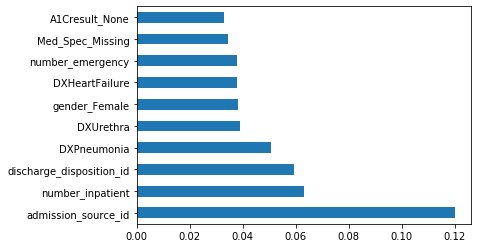

In [294]:
XGclf_best = XGclf_Rand.best_estimator_
(pd.Series(XGclf_best.feature_importances_, names)
   .nlargest(10)
   .plot(kind='barh'))

In [317]:
# predict for the train data. 
y_pred_train = XGclf1.predict(X_train_smote)
XGclf1_predict_proba_train = XGclf1.predict_proba(X_train_smote)
print(classification_report(y_train_smote, y_pred_train))
print("accuracy score is :", accuracy_score(y_train_smote, y_pred_train))

              precision    recall  f1-score   support

           0       0.64      0.68      0.66     61768
           1       0.66      0.62      0.64     61768

    accuracy                           0.65    123536
   macro avg       0.65      0.65      0.65    123536
weighted avg       0.65      0.65      0.65    123536

accuracy score is : 0.6511947934205414


In [318]:
XGclf1_pred_train = XGclf1_predict_proba_train[:,1]
print(roc_auc_score(y_train_smote, XGclf1_pred_train))

0.7003995981612726


In [296]:
#feature importance

feature_importances = pd.DataFrame(XGclf_best.feature_importances_,
                                   index = names,
                                   columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
admission_source_id,0.120179
number_inpatient,0.062977
discharge_disposition_id,0.059189
DXPneumonia,0.050757
DXUrethra,0.038976
gender_Female,0.038387
DXHeartFailure,0.037956
number_emergency,0.037822
Med_Spec_Missing,0.034452
A1Cresult_None,0.032989


Model Commentary: XG Boost with smote performed very similar to the other models with SMOTE. ROC AUC Score is 0.63 for test and for train 0.7 so we see some overfitting. Recall for the minority 1 class is again very low at 0.03.

# XGBoost - Undersampling

In [298]:
n_estimators = range(100, 1000, 50)
learning_rate = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6]
gamma = [0,0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75,3,3.25,3.5,3.75,4,4.25,4.5,4.75,5]
max_depth = [1,2]
param = dict(n_estimators=n_estimators,
             learning_rate = learning_rate,
             gamma = gamma,
             max_depth = max_depth )

In [299]:
XGclf = xgb.XGBClassifier()
XGclf_Rand = RandomizedSearchCV(XGclf, param, cv = 5, scoring = 'roc_auc')

In [300]:
XGclf_Rand.fit(X_train_under, y_train_under)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                      

In [301]:
XGclf_Rand.best_params_

{'n_estimators': 450, 'max_depth': 1, 'learning_rate': 0.2, 'gamma': 2.75}

In [302]:
XGclf_Rand.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=2.75, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=450, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [304]:
XGclf1 = xgb.XGBClassifier(max_depth=1, n_estimators=450,learning_rate=0.2, gamma=2.75,random_state=0)
XGclf1.fit(X_train_under, y_train_under)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=2.75, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=450, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [305]:
y_pred4 = XGclf1.predict(X_test)
XGclf1_predict_proba = XGclf1.predict_proba(X_test)

In [306]:
print(confusion_matrix(y_test, y_pred4))

[[18140  8415]
 [ 1508  1785]]


In [307]:
# Calculate the confusion matrix and classification report 
# Calculate the AUC score
print(classification_report(y_test, y_pred4))
print("accuracy score is :", accuracy_score(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.92      0.68      0.79     26555
           1       0.17      0.54      0.26      3293

    accuracy                           0.67     29848
   macro avg       0.55      0.61      0.52     29848
weighted avg       0.84      0.67      0.73     29848

accuracy score is : 0.667548914500134


In [308]:
XGclf1_pred = XGclf1_predict_proba[:,1]
print(roc_auc_score(y_test, XGclf1_pred))

0.6601773628100162


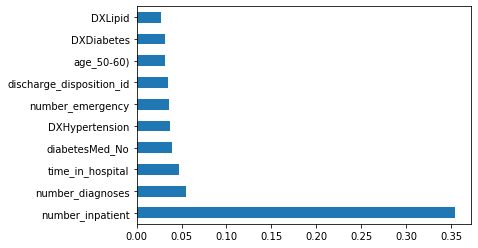

In [309]:
XGclf_best = XGclf_Rand.best_estimator_
(pd.Series(XGclf_best.feature_importances_, index = X_train_under.columns).nlargest(10).plot(kind='barh'))

In [312]:
# predict for the train data. 
y_pred_train = XGclf1.predict(X_train_under)
XGclf1_predict_proba_train = XGclf1.predict_proba(X_train_under)
print(classification_report(y_train_under, y_pred_train))
print("accuracy score is :", accuracy_score(y_train_under, y_pred_train))

              precision    recall  f1-score   support

           0       0.61      0.69      0.65      7876
           1       0.65      0.56      0.60      7876

    accuracy                           0.63     15752
   macro avg       0.63      0.63      0.63     15752
weighted avg       0.63      0.63      0.63     15752

accuracy score is : 0.6274758760792281


In [314]:
XGclf1_pred_train = XGclf1_predict_proba_train[:,1]
print(roc_auc_score(y_train_under, XGclf1_pred_train))

0.6823134795526702


In [315]:
#feature importance

feature_importances = pd.DataFrame(XGclf_best.feature_importances_,
                                   index = X_train_under.columns,
                                   columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
number_inpatient,0.354769
number_diagnoses,0.055200
time_in_hospital,0.047621
diabetesMed_No,0.039003
DXHypertension,0.036984
number_emergency,0.036580
discharge_disposition_id,0.035243
age_50-60),0.031874
DXDiabetes,0.031355
DXLipid,0.027473


Model Commentary: XGBoost with undersampling had similar results as our other undersampling models. Recall had a big jump to 0.54. Overall ROC AUC score jumped slighlty on undersampling test when compared to SMOTE test, 0.66 vs 0.627. There was not much overfitting as ROC AUC for train was 0.682 which is close to the test ROC AUC score of 0.66

# SVM with RBF Kernal - Smote

In [22]:
param_grid = {"C": np.arange(0.01, 3, 0.2), 'gamma': [0.01,0.1,1,10,100]}

In [23]:
svc1 = svm.SVC(kernel='rbf', random_state=0)

In [24]:
svc1_rs = RandomizedSearchCV(svc1, param_grid, cv = 3, scoring = 'roc_auc', n_jobs = -1, verbose = 0)

In [25]:
svc1_rs.fit(X_train_top_smote, y_train_top_smote)

RandomizedSearchCV(cv=3, estimator=SVC(random_state=0), n_jobs=-1,
                   param_distributions={'C': array([0.01, 0.21, 0.41, 0.61, 0.81, 1.01, 1.21, 1.41, 1.61, 1.81, 2.01,
       2.21, 2.41, 2.61, 2.81]),
                                        'gamma': [0.01, 0.1, 1, 10, 100]},
                   scoring='roc_auc')

In [26]:
svc1_rs.best_params_

{'gamma': 0.1, 'C': 2.61}

In [27]:
svc1_rs.best_estimator_

SVC(C=2.61, gamma=0.1, random_state=0)

In [28]:
y_pred1 = svc1_rs.best_estimator_.predict(X_test_top)

In [29]:
confusion_matrix(y_test_top, y_pred1)

array([[24557,  1978],
       [ 2999,   314]], dtype=int64)

In [30]:
print(classification_report(y_test_top, y_pred1))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91     26535
           1       0.14      0.09      0.11      3313

    accuracy                           0.83     29848
   macro avg       0.51      0.51      0.51     29848
weighted avg       0.81      0.83      0.82     29848



In [31]:
print(roc_auc_score(y_test_top, y_pred1))

0.5101175451770782


In [32]:
y_pred1_train = svc1_rs.best_estimator_.predict(X_train_top_smote)

In [33]:
confusion_matrix(y_train_top_smote, y_pred1_train)

array([[60970,   818],
       [  487, 61301]], dtype=int64)

In [34]:
print(classification_report(y_train_top_smote, y_pred1_train))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     61788
           1       0.99      0.99      0.99     61788

    accuracy                           0.99    123576
   macro avg       0.99      0.99      0.99    123576
weighted avg       0.99      0.99      0.99    123576



In [35]:
print(roc_auc_score(y_train_top_smote, y_pred1_train))

0.9894396970285492


Model Commentary: It was difficult to get SVM to run so we had to cut the features down to the top 40 most important base on our CHI square results.
Overall results with SMOTE were not good compared to the other models with SMOTE. ROC AUC score for test was the lowest at 0.51 and there was a lot of overfitting since train ROC AUC score was 0.989. The recall on the minority class was also low at 0.09 as we have seen with the other SMOTE models.

# SVM with RBF Kernal - Undersampling

In [78]:
params = {"C": np.arange(1, 100, 0.2), 'gamma': [0.0001,0.001,0.01,0.1,1], 'class_weight': ['balanced', None]}

In [79]:
svc1 = svm.SVC(kernel='rbf', random_state=0)

In [80]:
svc1_rs = RandomizedSearchCV(svc1, params, cv = 5, scoring = 'roc_auc', n_jobs = -1, verbose = 0)

In [81]:
svc1_rs.fit(X_train_top_under, y_train_top_under)

RandomizedSearchCV(cv=5, estimator=SVC(random_state=0), n_jobs=-1,
                   param_distributions={'C': array([ 1. ,  1.2,  1.4,  1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ,
        3.2,  3.4,  3.6,  3.8,  4. ,  4.2,  4.4,  4.6,  4.8,  5. ,  5.2,
        5.4,  5.6,  5.8,  6. ,  6.2,  6.4,  6.6,  6.8,  7. ,  7.2,  7.4,
        7.6,  7.8,  8. ,  8.2,  8.4,  8.6,  8.8,  9. ,  9.2,  9.4,  9.6,
        9.8, 10. , 10.2, 10.4, 10.6, 10.8, 11. , 11.2, 11.4, 11.6, 11.8,
       12. , 12.2, 12.4, 12.6, 12.8, 13. , 13.2, 13...
       89. , 89.2, 89.4, 89.6, 89.8, 90. , 90.2, 90.4, 90.6, 90.8, 91. ,
       91.2, 91.4, 91.6, 91.8, 92. , 92.2, 92.4, 92.6, 92.8, 93. , 93.2,
       93.4, 93.6, 93.8, 94. , 94.2, 94.4, 94.6, 94.8, 95. , 95.2, 95.4,
       95.6, 95.8, 96. , 96.2, 96.4, 96.6, 96.8, 97. , 97.2, 97.4, 97.6,
       97.8, 98. , 98.2, 98.4, 98.6, 98.8, 99. , 99.2, 99.4, 99.6, 99.8]),
                                        'class_weight': ['balanced', None],
                         

In [82]:
svc1_rs.best_params_

{'gamma': 0.0001, 'class_weight': 'balanced', 'C': 61.79999999999998}

In [83]:
svc1_rs.best_estimator_

SVC(C=61.79999999999998, class_weight='balanced', gamma=0.0001, random_state=0)

In [84]:
y_pred1 = svc1_rs.best_estimator_.predict(X_test_top)

In [85]:
confusion_matrix(y_test_top, y_pred1)

array([[19783,  6752],
       [ 1894,  1419]], dtype=int64)

In [86]:
print(classification_report(y_test_top, y_pred1))

              precision    recall  f1-score   support

           0       0.91      0.75      0.82     26535
           1       0.17      0.43      0.25      3313

    accuracy                           0.71     29848
   macro avg       0.54      0.59      0.53     29848
weighted avg       0.83      0.71      0.76     29848



In [87]:
print(roc_auc_score(y_test_top, y_pred1))

0.5869281645738268


In [124]:
y_pred1_train = svc1_rs.best_estimator_.predict(X_train_top_under)

In [125]:
confusion_matrix(y_train_top_under, y_pred1_train)

array([[5976, 1880],
       [4488, 3368]], dtype=int64)

In [126]:
print(classification_report(y_train_top_under, y_pred1_train))

              precision    recall  f1-score   support

           0       0.57      0.76      0.65      7856
           1       0.64      0.43      0.51      7856

    accuracy                           0.59     15712
   macro avg       0.61      0.59      0.58     15712
weighted avg       0.61      0.59      0.58     15712



In [127]:
print(roc_auc_score(y_train_top_under, y_pred1_train))

0.5947046843177191


Model Commentary: The SVM results improved with undersampling vs SMOTE but not by much. ROC AUC score on undersampling test was 0.587 vs 0.51 for SMOTE test. Recall on the minority class did increase to 0.43 when undersampling as with other models. Train and test scores were very similar so no overfitting but the overall results were the worst of all the models. We tried SVM with a linear kernal but the results were the similar to RBF and getting it to run took too long to get inside this consolidated group workbook so we left it out.

# Deep Learning (SMOTE)

In [17]:
# create model
model_dnn2 = Sequential()
model_dnn2.add(Dense(len(X_train_smote.columns), input_dim=len(X_train_smote.columns), activation='relu'))
#model_dnn2.add(Dropout(0.5))
model_dnn2.add(Dense(len(X_train_smote.columns), input_dim=len(X_train_smote.columns), activation='relu'))
#model_dnn2.add(Dropout(0.5))
model_dnn2.add(Dense(len(X_train_smote.columns), input_dim=len(X_train_smote.columns), activation='relu'))
#model_dnn2.add(Dropout(0.5))
model_dnn2.add(Dense(len(X_train_smote.columns), input_dim=len(X_train_smote.columns), activation='relu'))
#model_dnn2.add(Dropout(0.5))
#model_dnn2.add(Dense(len(X_train_smote.columns), input_dim=len(X_train_smote.columns), activation='relu'))
#model_dnn2.add(Dropout(0.5))
#model_dnn2.add(Dense(len(X_train_smote.columns), input_dim=len(X_train_smote.columns), activation='relu'))
#model_dnn2.add(Dropout(0.5))
model_dnn2.add(Dense(1, activation='sigmoid'))

# Set optimizer and learning rate
opt = keras.optimizers.Adam(learning_rate=0.001)

# Compile model
model_dnn2.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [18]:
model_dnn2.fit(X_train_smote, y_train_smote, epochs=16, batch_size=10)

Epoch 1/16
12354/12354 [==============================] - 10s 785us/step - loss: 0.5955 - accuracy: 0.6786
Epoch 2/16
12354/12354 [==============================] - 10s 798us/step - loss: 0.4821 - accuracy: 0.7695
Epoch 3/16
12354/12354 [==============================] - 10s 770us/step - loss: 0.4035 - accuracy: 0.8184
Epoch 4/16
12354/12354 [==============================] - 9s 769us/step - loss: 0.3507 - accuracy: 0.8468
Epoch 5/16
12354/12354 [==============================] - 10s 801us/step - loss: 0.3121 - accuracy: 0.8679
Epoch 6/16
12354/12354 [==============================] - 10s 792us/step - loss: 0.2818 - accuracy: 0.8815
Epoch 7/16
12354/12354 [==============================] - 10s 785us/step - loss: 0.2570 - accuracy: 0.8935
Epoch 8/16
12354/12354 [==============================] - 9s 756us/step - loss: 0.2394 - accuracy: 0.9034
Epoch 9/16
12354/12354 [==============================] - 10s 771us/step - loss: 0.2237 - accuracy: 0.9097
Epoch 10/16
12354/12354 [==============

In [20]:
test_loss_dnn2 = 0.00
test_acc_dnn2 = 0.00

test_loss_dnn2, test_acc_dnn2 = model_dnn2.evaluate(X_test, y_test)

933/933 [==============================] - 0s 463us/step - loss: 0.9691 - accuracy: 0.8170


In [21]:
print('Test accuracy:', test_acc_dnn2)

Test accuracy: 0.8170396685600281


In [22]:
# predict on test data using model
y_pred_dnn_prob2 = []
y_pred_dnn2 = []

y_pred_dnn_prob2 = model_dnn2.predict(X_test)
y_pred_dnn2 = (y_pred_dnn_prob2 > 0.5)

In [23]:
# create confusion matrix with y test against y predictions from model
confusion_matrix(y_test, y_pred_dnn2)

array([[23836,  2719],
       [ 2742,   551]], dtype=int64)

In [24]:
# create classification report with y test against y predictions from model
print(classification_report(y_test, y_pred_dnn2))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90     26555
           1       0.17      0.17      0.17      3293

    accuracy                           0.82     29848
   macro avg       0.53      0.53      0.53     29848
weighted avg       0.82      0.82      0.82     29848



In [25]:
# limit to probability for class = 1
base_probs_dnn2 = []

base_probs_dnn2 = y_pred_dnn_prob2[:,0]

# calculate roc_auc_score
print(roc_auc_score(y_test, base_probs_dnn2))

0.5729274818411421


In [26]:
# predict on train data using model
y_pred_dnn_prob_train2 = []
y_pred_dnn_train2 = []

y_pred_dnn_prob_train2 = model_dnn2.predict(X_train_smote)
y_pred_dnn_train2 = (y_pred_dnn_prob_train2 > 0.5)

In [27]:
# create confusion matrix with y train against y predictions from model
confusion_matrix(y_train_smote, y_pred_dnn_train2)

array([[59569,  2199],
       [ 3752, 58016]], dtype=int64)

In [28]:
# create classification report with y train against y predictions from model
print(classification_report(y_train_smote, y_pred_dnn_train2))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     61768
           1       0.96      0.94      0.95     61768

    accuracy                           0.95    123536
   macro avg       0.95      0.95      0.95    123536
weighted avg       0.95      0.95      0.95    123536



In [29]:
# limit to probability for class = 1
base_probs_dnn_train2 = []

base_probs_dnn_train2 = y_pred_dnn_prob_train2[:,0]

# calculate roc_auc_score
print(roc_auc_score(y_train_smote, base_probs_dnn_train2))

0.9906607138642518


Model Commentary: Our Deep Learning model with SMOTE had an AUC ROC Score of 0.58 for test and is a bit lower than most models. The AUC ROC score for train is 0.99 so there is a lot of overfitting going on. Recall on the minority 1 class is poor at 0.17 like the other models.

# Deep Learning (Undersampling)

In [16]:
# create model
model_dnn = Sequential()
model_dnn.add(Dense(len(X_train_under.columns), input_dim=len(X_train_under.columns), activation='relu'))
#model_dnn.add(Dropout(0.5))
model_dnn.add(Dense(len(X_train_under.columns), input_dim=len(X_train_under.columns), activation='relu'))
#model_dnn.add(Dropout(0.5))
model_dnn.add(Dense(len(X_train_under.columns), input_dim=len(X_train_under.columns), activation='relu'))
#model_dnn.add(Dropout(0.5))
model_dnn.add(Dense(len(X_train_under.columns), input_dim=len(X_train_under.columns), activation='relu'))
#model_dnn.add(Dropout(0.5))
#model_dnn.add(Dense(len(X_train_smote.columns), input_dim=len(X_train_under.columns), activation='relu'))
#model_dnn.add(Dropout(0.5))
#model_dnn.add(Dense(len(X_train_smote.columns), input_dim=len(X_train_under.columns), activation='relu'))
#model_dnn.add(Dropout(0.5))
model_dnn.add(Dense(1, activation='sigmoid'))

# Set optimizer and learning rate
opt = keras.optimizers.Adam(learning_rate=0.001)

# Compile model
model_dnn.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [203]:
model_dnn.fit(X_train_under, y_train_under, epochs=16, batch_size=10)

Epoch 1/16
1576/1576 [==============================] - 2s 1ms/step - loss: 0.6755 - accuracy: 0.5788
Epoch 2/16
1576/1576 [==============================] - 2s 1ms/step - loss: 0.6573 - accuracy: 0.6092
Epoch 3/16
1576/1576 [==============================] - 2s 1ms/step - loss: 0.6490 - accuracy: 0.6215
Epoch 4/16
1576/1576 [==============================] - 2s 1ms/step - loss: 0.6402 - accuracy: 0.6333
Epoch 5/16
1576/1576 [==============================] - 2s 1ms/step - loss: 0.6275 - accuracy: 0.6454
Epoch 6/16
1576/1576 [==============================] - 2s 1ms/step - loss: 0.6118 - accuracy: 0.6559
Epoch 7/16
1576/1576 [==============================] - 2s 1ms/step - loss: 0.5921 - accuracy: 0.6809
Epoch 8/16
1576/1576 [==============================] - 3s 2ms/step - loss: 0.5667 - accuracy: 0.6999
Epoch 9/16
1576/1576 [==============================] - 3s 2ms/step - loss: 0.5346 - accuracy: 0.7227
Epoch 10/16
1576/1576 [==============================] - 3s 2ms/step - loss: 0.503

In [204]:
test_loss_dnn = 0.00
test_acc_dnn = 0.00

test_loss_dnn, test_acc_dnn = model_dnn.evaluate(X_test, y_test)

933/933 [==============================] - 1s 1ms/step - loss: 1.4243 - accuracy: 0.5449


In [205]:
print('Test accuracy:', test_acc_dnn)

Test accuracy: 0.5449276566505432


In [206]:
# predict on test data using model
y_pred_dnn_prob = []
y_pred_dnn = []

y_pred_dnn_prob = model_dnn.predict(X_test)
y_pred_dnn = (y_pred_dnn_prob > 0.5)

In [207]:
# create confusion matrix with y test against y predictions from model
confusion_matrix(y_test, y_pred_dnn)

array([[14375, 12180],
       [ 1403,  1890]], dtype=int64)

In [208]:
# create classification report with y test against y predictions from model
print(classification_report(y_test, y_pred_dnn))

              precision    recall  f1-score   support

           0       0.91      0.54      0.68     26555
           1       0.13      0.57      0.22      3293

    accuracy                           0.54     29848
   macro avg       0.52      0.56      0.45     29848
weighted avg       0.83      0.54      0.63     29848



In [209]:
# limit to probability for class = 1
base_probs_dnn = []

base_probs_dnn = y_pred_dnn_prob[:,0]

# calculate roc_auc_score
print(roc_auc_score(y_test, base_probs_dnn))

0.5817765476290606


In [210]:
# predict on train data using model
y_pred_dnn_prob_train = []
y_pred_dnn_train = []

y_pred_dnn_prob_train = model_dnn.predict(X_train_under)
y_pred_dnn_train = (y_pred_dnn_prob_train > 0.5)

In [211]:
# create confusion matrix with y train against y predictions from model
confusion_matrix(y_train_under, y_pred_dnn_train)

array([[6991,  885],
       [ 722, 7154]], dtype=int64)

In [212]:
# create classification report with y train against y predictions from model
print(classification_report(y_train_under, y_pred_dnn_train))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      7876
           1       0.89      0.91      0.90      7876

    accuracy                           0.90     15752
   macro avg       0.90      0.90      0.90     15752
weighted avg       0.90      0.90      0.90     15752



In [213]:
# limit to probability for class = 1
base_probs_dnn_train = []

base_probs_dnn_train = y_pred_dnn_prob_train[:,0]

# calculate roc_auc_score
print(roc_auc_score(y_train_under, base_probs_dnn_train))

0.9682946094892364


Model Commentary: Deep Learning with undersampling had very similar results as with SMOTE. The ROC AUC score for test undersampling was around the same at 0.58. There was again overfitting as train ROC AUC score was much higher at 0.968. The recall on the minority 1 class for test did jump to 0.57 vs SMOTE as with other models. We tried many combinations to get this model to score better. Different activation functions, optimizers, dropout to help with the overfitting, more or less hidden layers, different learning rates but this was the best balance we could come up with where we at least prdicted the minority class with some regularity. The overall results were on par with SVM and were the 2 worst models overall. We don't think we had enough data to take advantage of deep learning or SVM, especially with the imbalance problem.

# ROC AUC Visualizations - Smote

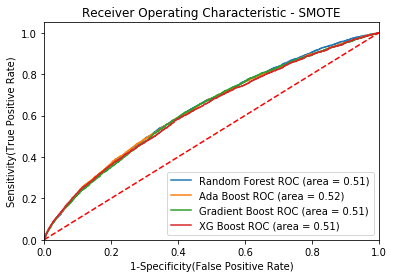

In [30]:
plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Random Forest',
    'model': RandomForestClassifier(random_state=0, bootstrap=False, n_estimators=200, max_features='sqrt', 
                                    min_samples_split=2, min_samples_leaf=2, max_depth=100),
},
{
    'label': 'Ada Boost',
    'model': AdaBoostClassifier(learning_rate=0.6, n_estimators=600, random_state=27),
},
{
    'label': 'Gradient Boost',
    'model': GradientBoostingClassifier(learning_rate=0.2, max_depth=2, n_estimators=100,
                           random_state=27),
},
{
    'label': 'XG Boost',
    'model': xgb.XGBClassifier(learning_rate=0.5, max_depth=1, n_estimators=500, gamma=3.75, random_state=0),
}
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train_smote, y_train_smote) # train the model
    y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = roc_auc_score(y_test,model.predict(X_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic - SMOTE')
plt.legend(loc="lower right")
plt.show()

Commentary: We were able to visualize our 4 best models and they all had similar results with a curve area of around 0.51 to 0.52.

# ROC AUC Visualizations - Undersampling

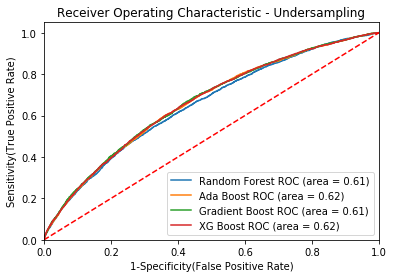

In [49]:
plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Random Forest',
    'model': RandomForestClassifier(random_state=0, bootstrap=True, n_estimators=2000, max_features='auto', 
                                    min_samples_split=2, min_samples_leaf=2, max_depth=None),
},
{
    'label': 'Ada Boost',
    'model': AdaBoostClassifier(learning_rate=0.4, n_estimators=200, random_state=0),
},
{
    'label': 'Gradient Boost',
    'model': GradientBoostingClassifier(learning_rate=0.1, max_depth=2, n_estimators=200,
                           random_state=27),
},
{
    'label': 'XG Boost',
    'model': xgb.XGBClassifier(learning_rate=0.2, max_depth=1, n_estimators=450, gamma=2.75, random_state=0),
}

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train_under, y_train_under) # train the model
    y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = roc_auc_score(y_test,model.predict(X_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic - Undersampling')
plt.legend(loc="lower right")
plt.show()

Commentary: We visualized the 4 best models but with undersampling this time and they were all very similar as well but were higher when compared to SMOTE at around 0.61 to 0.62.

Conclusions: 
- Our imbalance issue was difficult to overcome. 
- Our base model did not do well at predicting the minorty 1 class, which was whether there would be a readdmission within 30 days.We tried SMOTE to oversample the minority class but this did not work well with any of the models and remained poor at predicting the minority class. We tried to undersample and our results improved significantly at predicting the minority class but at the expense of predicting the majority class accurately. We tried different combinations of oversampling and undersampling but settled at undersampling to 100% where the majority class equalled the minority class and this seemed to be the sweet spot for the best results on our models.
- We also tried feature reduction from our CHI squared analysis to help with our overfitting and to just improve the test results in general but that did not help so we ran our models with all our preprocessed columns.
- There were four models that all performed almost exactly alike, Random Forest, ADA Boost, Gradient Boost, and XG Boost.
- SVM and Deep Learning did the poorest and we think the imblanace issue did not allow us to take advantage of these models as it made our dataset much smaller.